# Finding Average Prices (Regression Problem)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_price =pd.read_csv(r'D:\Backup\Old PC\Chandan\Data Science\Internship\Final Project\Phase-1\avocado.csv')
df_price =df_price.sample(frac =1)
df_price.head(15)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8156,49,2017-01-22,0.88,113430.50,19006.07,38753.45,153.69,55517.29,49749.97,5680.78,86.54,conventional,2017,Spokane
5477,17,2016-08-28,1.09,33993931.31,12561055.50,10420973.00,563738.54,10448164.27,8503870.88,1785021.92,159271.47,conventional,2016,TotalUS
8307,41,2017-03-19,1.58,312270.07,174757.38,47825.60,67.14,89619.95,56385.93,33211.80,22.22,conventional,2017,Tampa
14356,31,2016-05-22,1.44,63165.58,15850.58,10455.82,422.78,36436.40,29566.47,6869.93,0.00,organic,2016,Southeast
15239,21,2017-08-06,2.06,10853.28,221.48,4752.99,0.00,5808.95,3807.57,2001.38,0.00,organic,2017,CincinnatiDayton
38,38,2015-04-05,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany
14876,29,2017-06-11,2.17,23607.15,1138.12,11797.51,140.20,10531.32,10531.32,0.00,0.00,organic,2017,BaltimoreWashington
891,7,2015-11-08,1.16,309186.06,5048.20,260745.71,171.88,43220.27,37770.33,5449.94,0.00,conventional,2015,HartfordSpringfield
12602,45,2016-02-14,1.18,30537.03,6478.87,3527.28,27.51,20503.37,1928.78,18574.59,0.00,organic,2016,Denver
2286,50,2015-01-11,1.06,527350.82,144349.43,278069.43,18076.48,86855.48,81221.30,5632.65,1.53,conventional,2015,Seattle


In [3]:
df_price.shape

(18249, 14)

In [4]:
# Deleting 1st and 2nd column
df_price.drop(columns =['Unnamed: 0'], inplace =True)
df_price.drop(columns =[], inplace =True)

In [5]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 8156 to 7270
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [6]:
# Changing Date to datetime format
df_price['Date'] =pd.to_datetime(df_price['Date'], format ='%Y-%m-%d')
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 8156 to 7270
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


__There is no null value present in the dataset.__

In [7]:
df_price.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,2016-08-13 23:30:43.498273792,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
min,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938


In [8]:
# Checking duplicate columns in the dataset
print("No. Duplicate columns :", df_price.duplicated().sum())

No. Duplicate columns : 0


__No duplicate record present in the dataset.__

In [9]:
# Shape of dataset
df_price.shape

(18249, 13)

In [10]:
# Checking count of each column
for i in df_price:
    print(df_price[i].value_counts())

Date
2017-01-22    108
2018-03-25    108
2015-01-18    108
2015-04-26    108
2017-08-20    108
             ... 
2017-05-14    108
2015-12-13    108
2017-06-18    107
2015-12-06    107
2017-06-25    107
Name: count, Length: 169, dtype: int64
AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
0.48      1
3.05      1
3.17      1
2.68      1
2.96      1
Name: count, Length: 259, dtype: int64
Total Volume
4103.97      2
46602.16     2
3713.49      2
2858.31      2
569349.05    2
            ..
235430.29    1
200715.34    1
10795.73     1
5161.57      1
288581.65    1
Name: count, Length: 18237, dtype: int64
4046
0.00         242
3.00          10
4.00           8
1.24           8
1.00           8
            ... 
46.61          1
747618.37      1
458.88         1
41800.77       1
176622.72      1
Name: count, Length: 17702, dtype: int64
4225
0.00         61
1.30          3
177.87        3
94.74         3
215.36        3
             ..
223410.75     1
17343

In [11]:
# Seperating numerical and categorical columns

# Seperating Numerical columnns
num_col =[]
for i in df_price.dtypes.index:
    if df_price[i].dtypes =='float64' or df_price[i].dtypes =='int64':
        num_col.append(i)
print("Numerical columns are :", num_col)

#Seperating Categorical columns
cat_col =[]
for i in df_price.dtypes.index:
    if df_price[i].dtypes =='object':
        cat_col.append(i)
print("Categorial Columns are :", cat_col)
    

Numerical columns are : ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']
Categorial Columns are : ['type', 'region']


In [12]:
# Checking number of unique values
df_price.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


## Visualizing Data

### Univariate Analysis

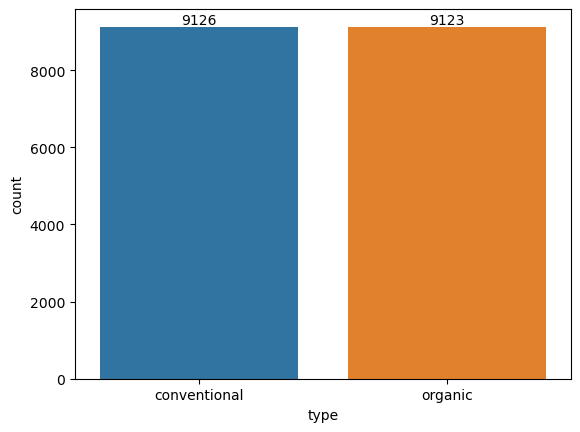

In [13]:
# Plotting type
ax =sns.countplot(x ='type', data=df_price)
ax.bar_label(ax.containers[0], fontsize =10)
plt.show()

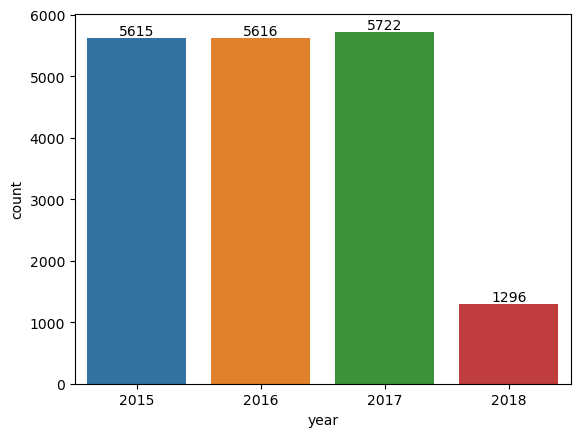

In [14]:
#Plotting year
ax =sns.countplot(x ='year', data =df_price)
ax.bar_label(ax.containers[0], fontsize =10)
plt.show()

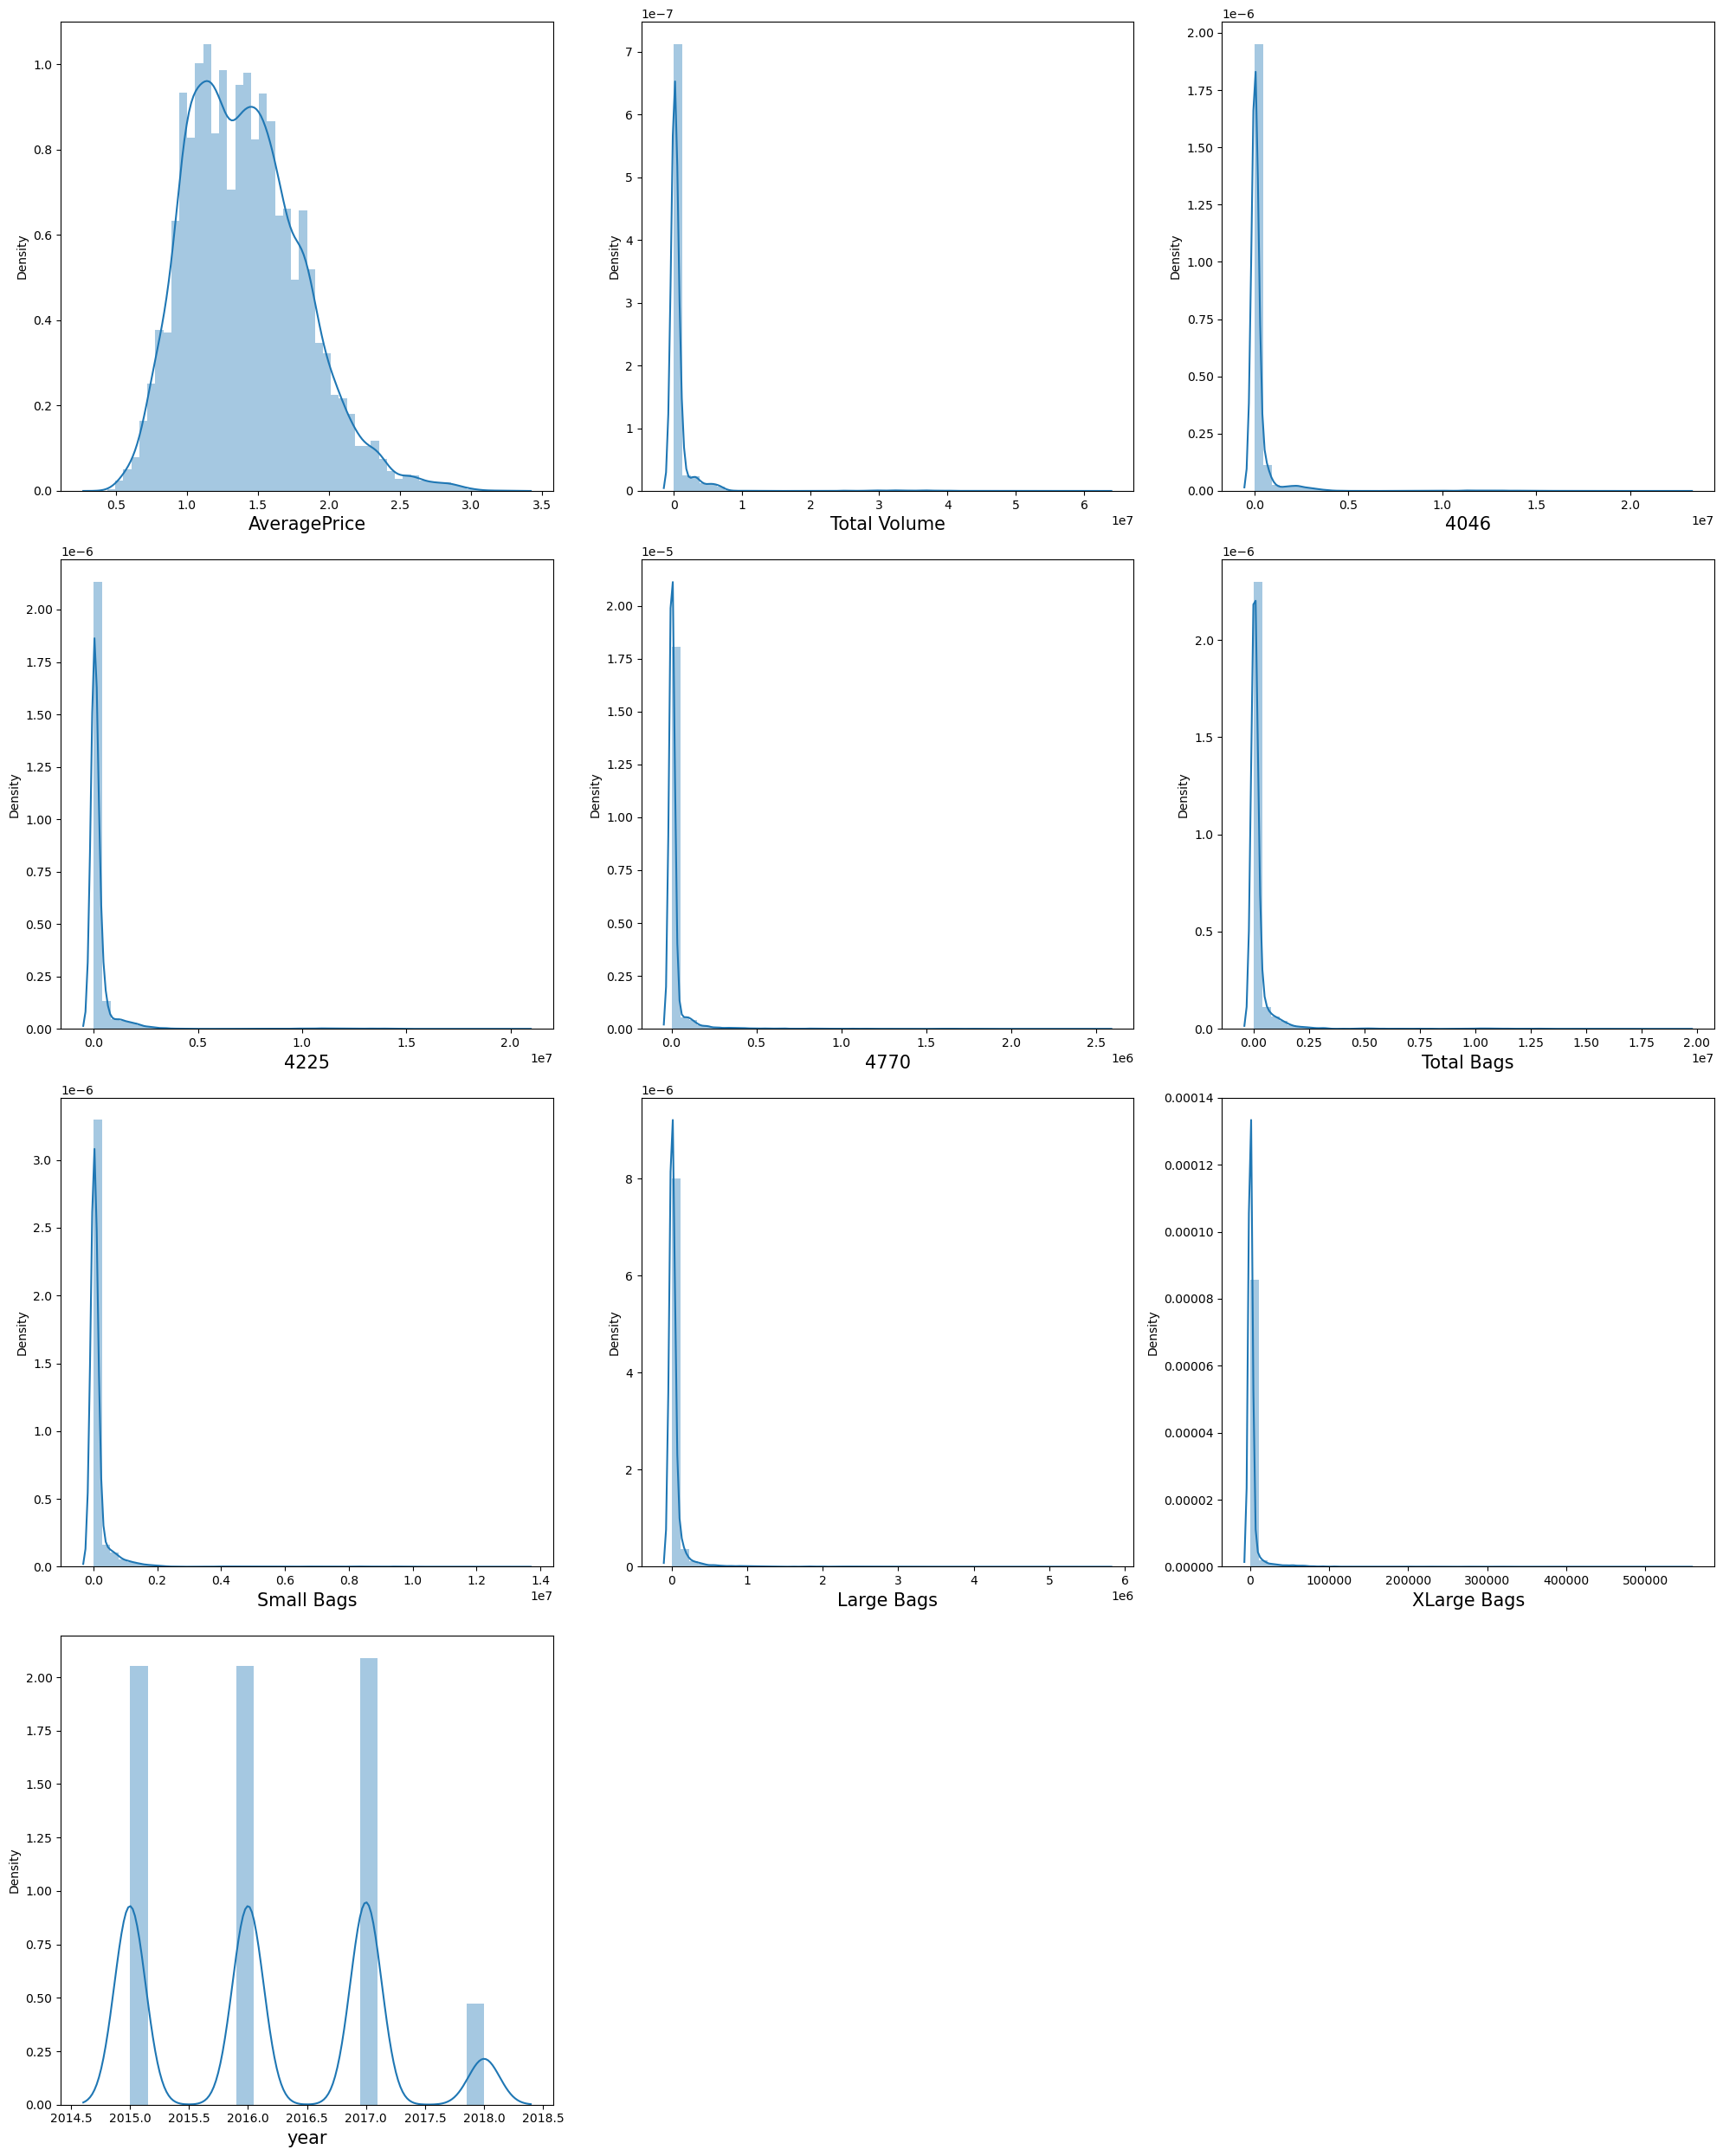

In [15]:
# Checking data distribution for numerical columns
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_col:
    if plotnumber <= 12:
        plt.subplot(4, 3, plotnumber)
        sns.distplot(df_price[i])
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.tight_layout()

### Bivariate Analysis

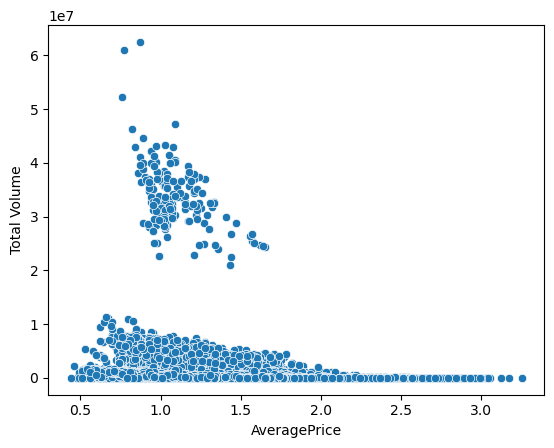

In [16]:
# Comparasion between AveragePrice and total volume
sns.scatterplot(x ='AveragePrice', y ='Total Volume', data =df_price, palette ='bright')
plt.show()

__When AveragePrice is less Total Volume is more.__

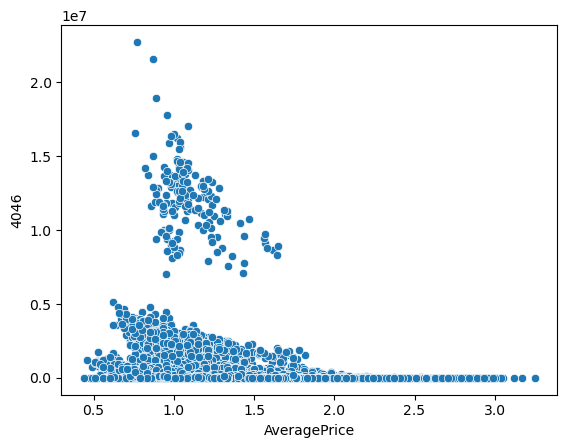

In [17]:
# Comparasion between AveragePrice and 4046
sns.scatterplot(x ='AveragePrice', y ='4046', data =df_price, palette ='bright')
plt.show()

__When average price is less, sale is more.__

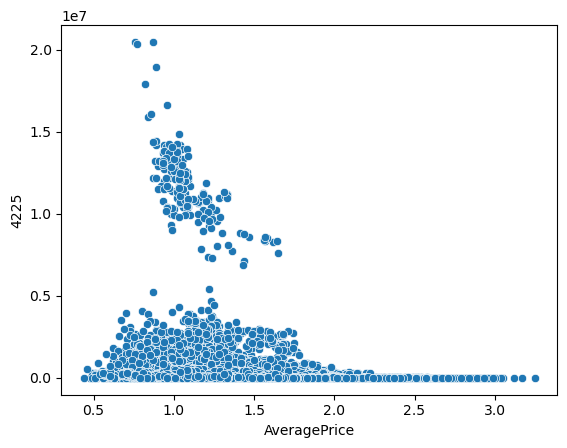

In [18]:
# Comparasion between AveragePrice and 4225
sns.scatterplot(x ='AveragePrice', y ='4225', data =df_price, palette ='bright')
plt.show()

__When average price is less, sale is more.__

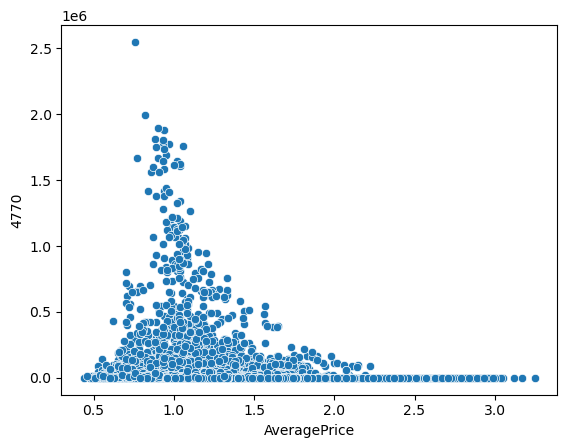

In [19]:
# Comparasion between AveragePrice and 4770
sns.scatterplot(x ='AveragePrice', y ='4770', data =df_price, palette ='bright')
plt.show()

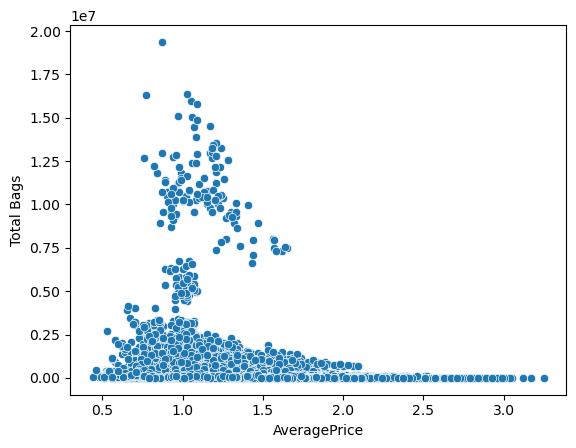

In [20]:
# Comparasion between AveragePrice and Total Bags
sns.scatterplot(x ='AveragePrice', y ='Total Bags', data =df_price, palette ='bright')
plt.show()

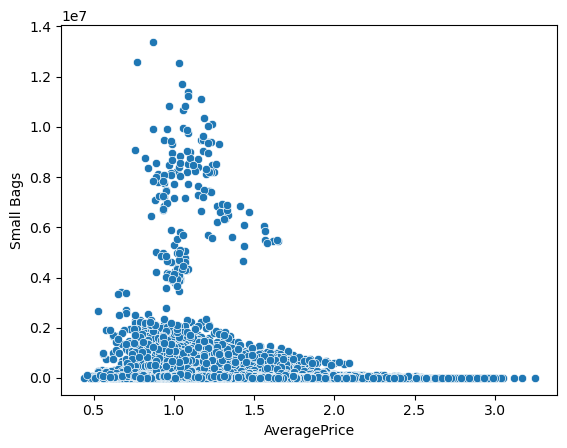

In [21]:
# Comparasion between AveragePrice and Small Bags
sns.scatterplot(x ='AveragePrice', y ='Small Bags', data =df_price, palette ='bright')
plt.show()

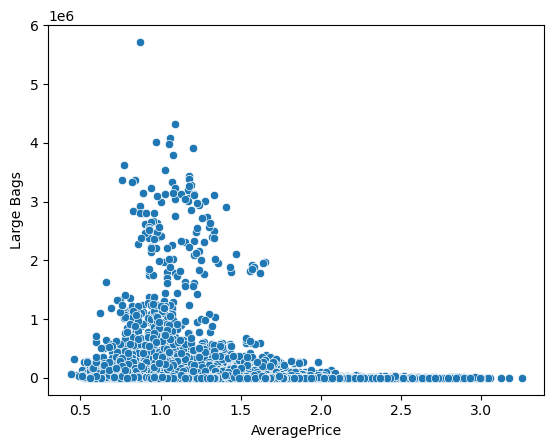

In [22]:
# Comparasion between AveragePrice and Large Bags
sns.scatterplot(x ='AveragePrice', y ='Large Bags', data =df_price, palette ='bright')
plt.show()

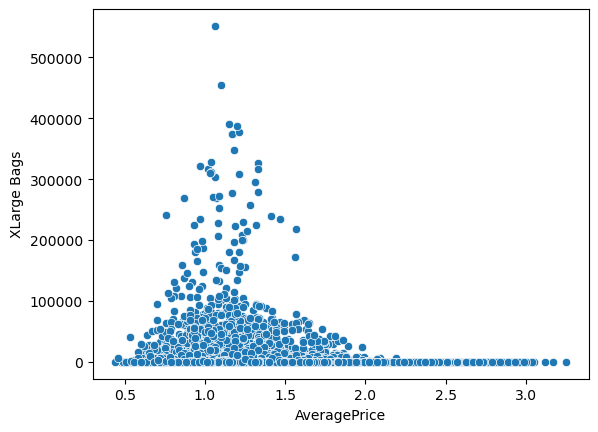

In [23]:
# Comparasion between AveragePrice and XLarge Bags
sns.scatterplot(x ='AveragePrice', y ='XLarge Bags', data =df_price, palette ='bright')
plt.show()

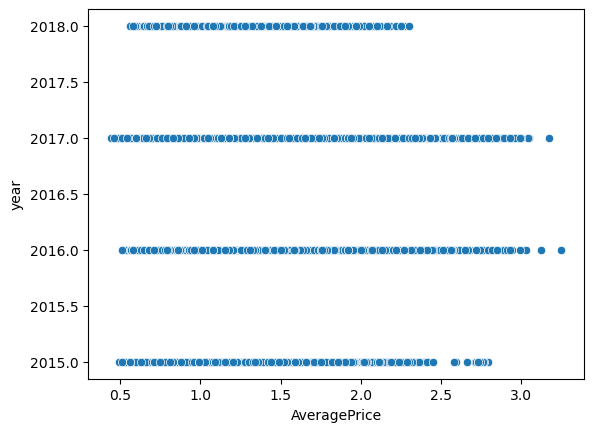

In [24]:
# Comparasion between AveragePrice and XLarge Bags
sns.scatterplot(x ='AveragePrice', y ='year', data =df_price, palette ='bright')
plt.show()

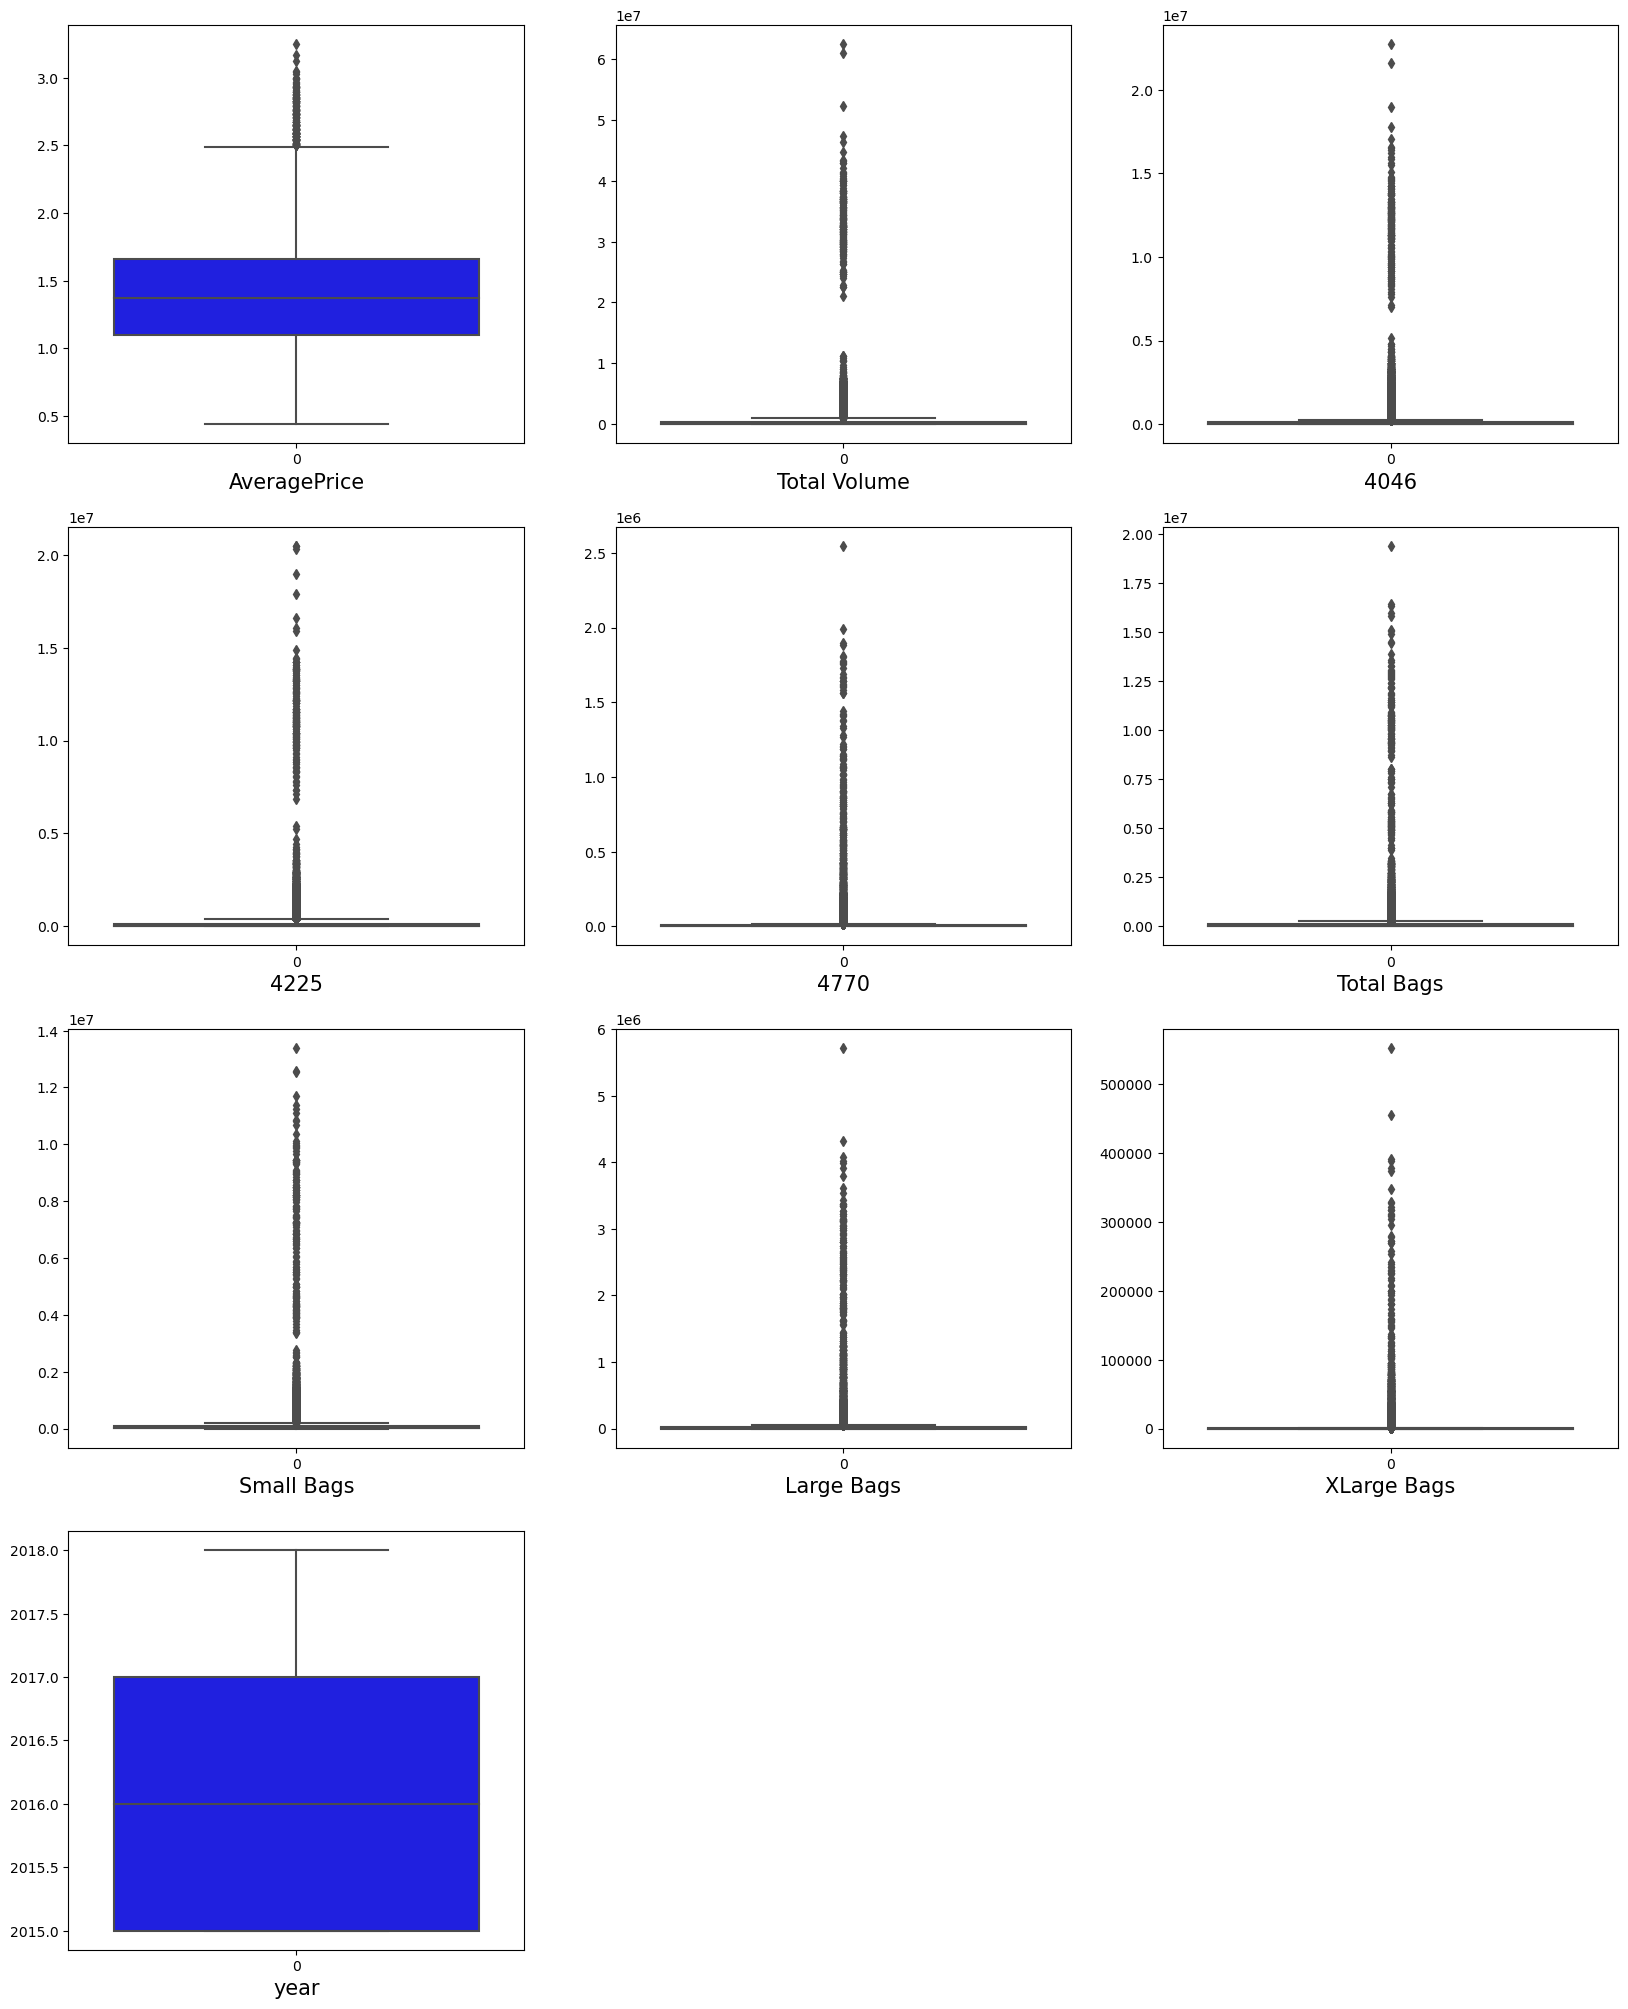

In [25]:
# Checking for outliers
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_col:
    
    if plotnumber<=12:
        plt.subplot(4, 3, plotnumber)
        sns.boxplot(df_price[i], color ='b')
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.show()

In [26]:
# Checking skewness in the dataset
df_price[num_col].skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [27]:
df_price['Total Volume'] =np.log(df_price['Total Volume'])
df_price['4046'] =np.log(df_price['4046']+1)
df_price['4225'] =np.log(df_price['4225']+1)
df_price['4770'] =np.log(df_price['4770']+1)
df_price['Total Bags'] =np.log(df_price['Total Bags']+1)
df_price['Small Bags'] =np.log(df_price['Small Bags']+1)
df_price['Large Bags'] =np.log(df_price['Large Bags']+1)
df_price['XLarge Bags'] =np.log(df_price['XLarge Bags']+1)

In [28]:
# Again checking skewness
df_price[num_col].skew()

AveragePrice    0.580303
Total Volume    0.087954
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
dtype: float64

In [29]:
# Again reducing skewness in the XLarge Bags column
df_price['XLarge Bags'] =np.cbrt(df_price['XLarge Bags'])

In [30]:
# Again checking skewness
df_price[num_col].skew()

AveragePrice    0.580303
Total Volume    0.087954
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     0.775807
year            0.215339
dtype: float64

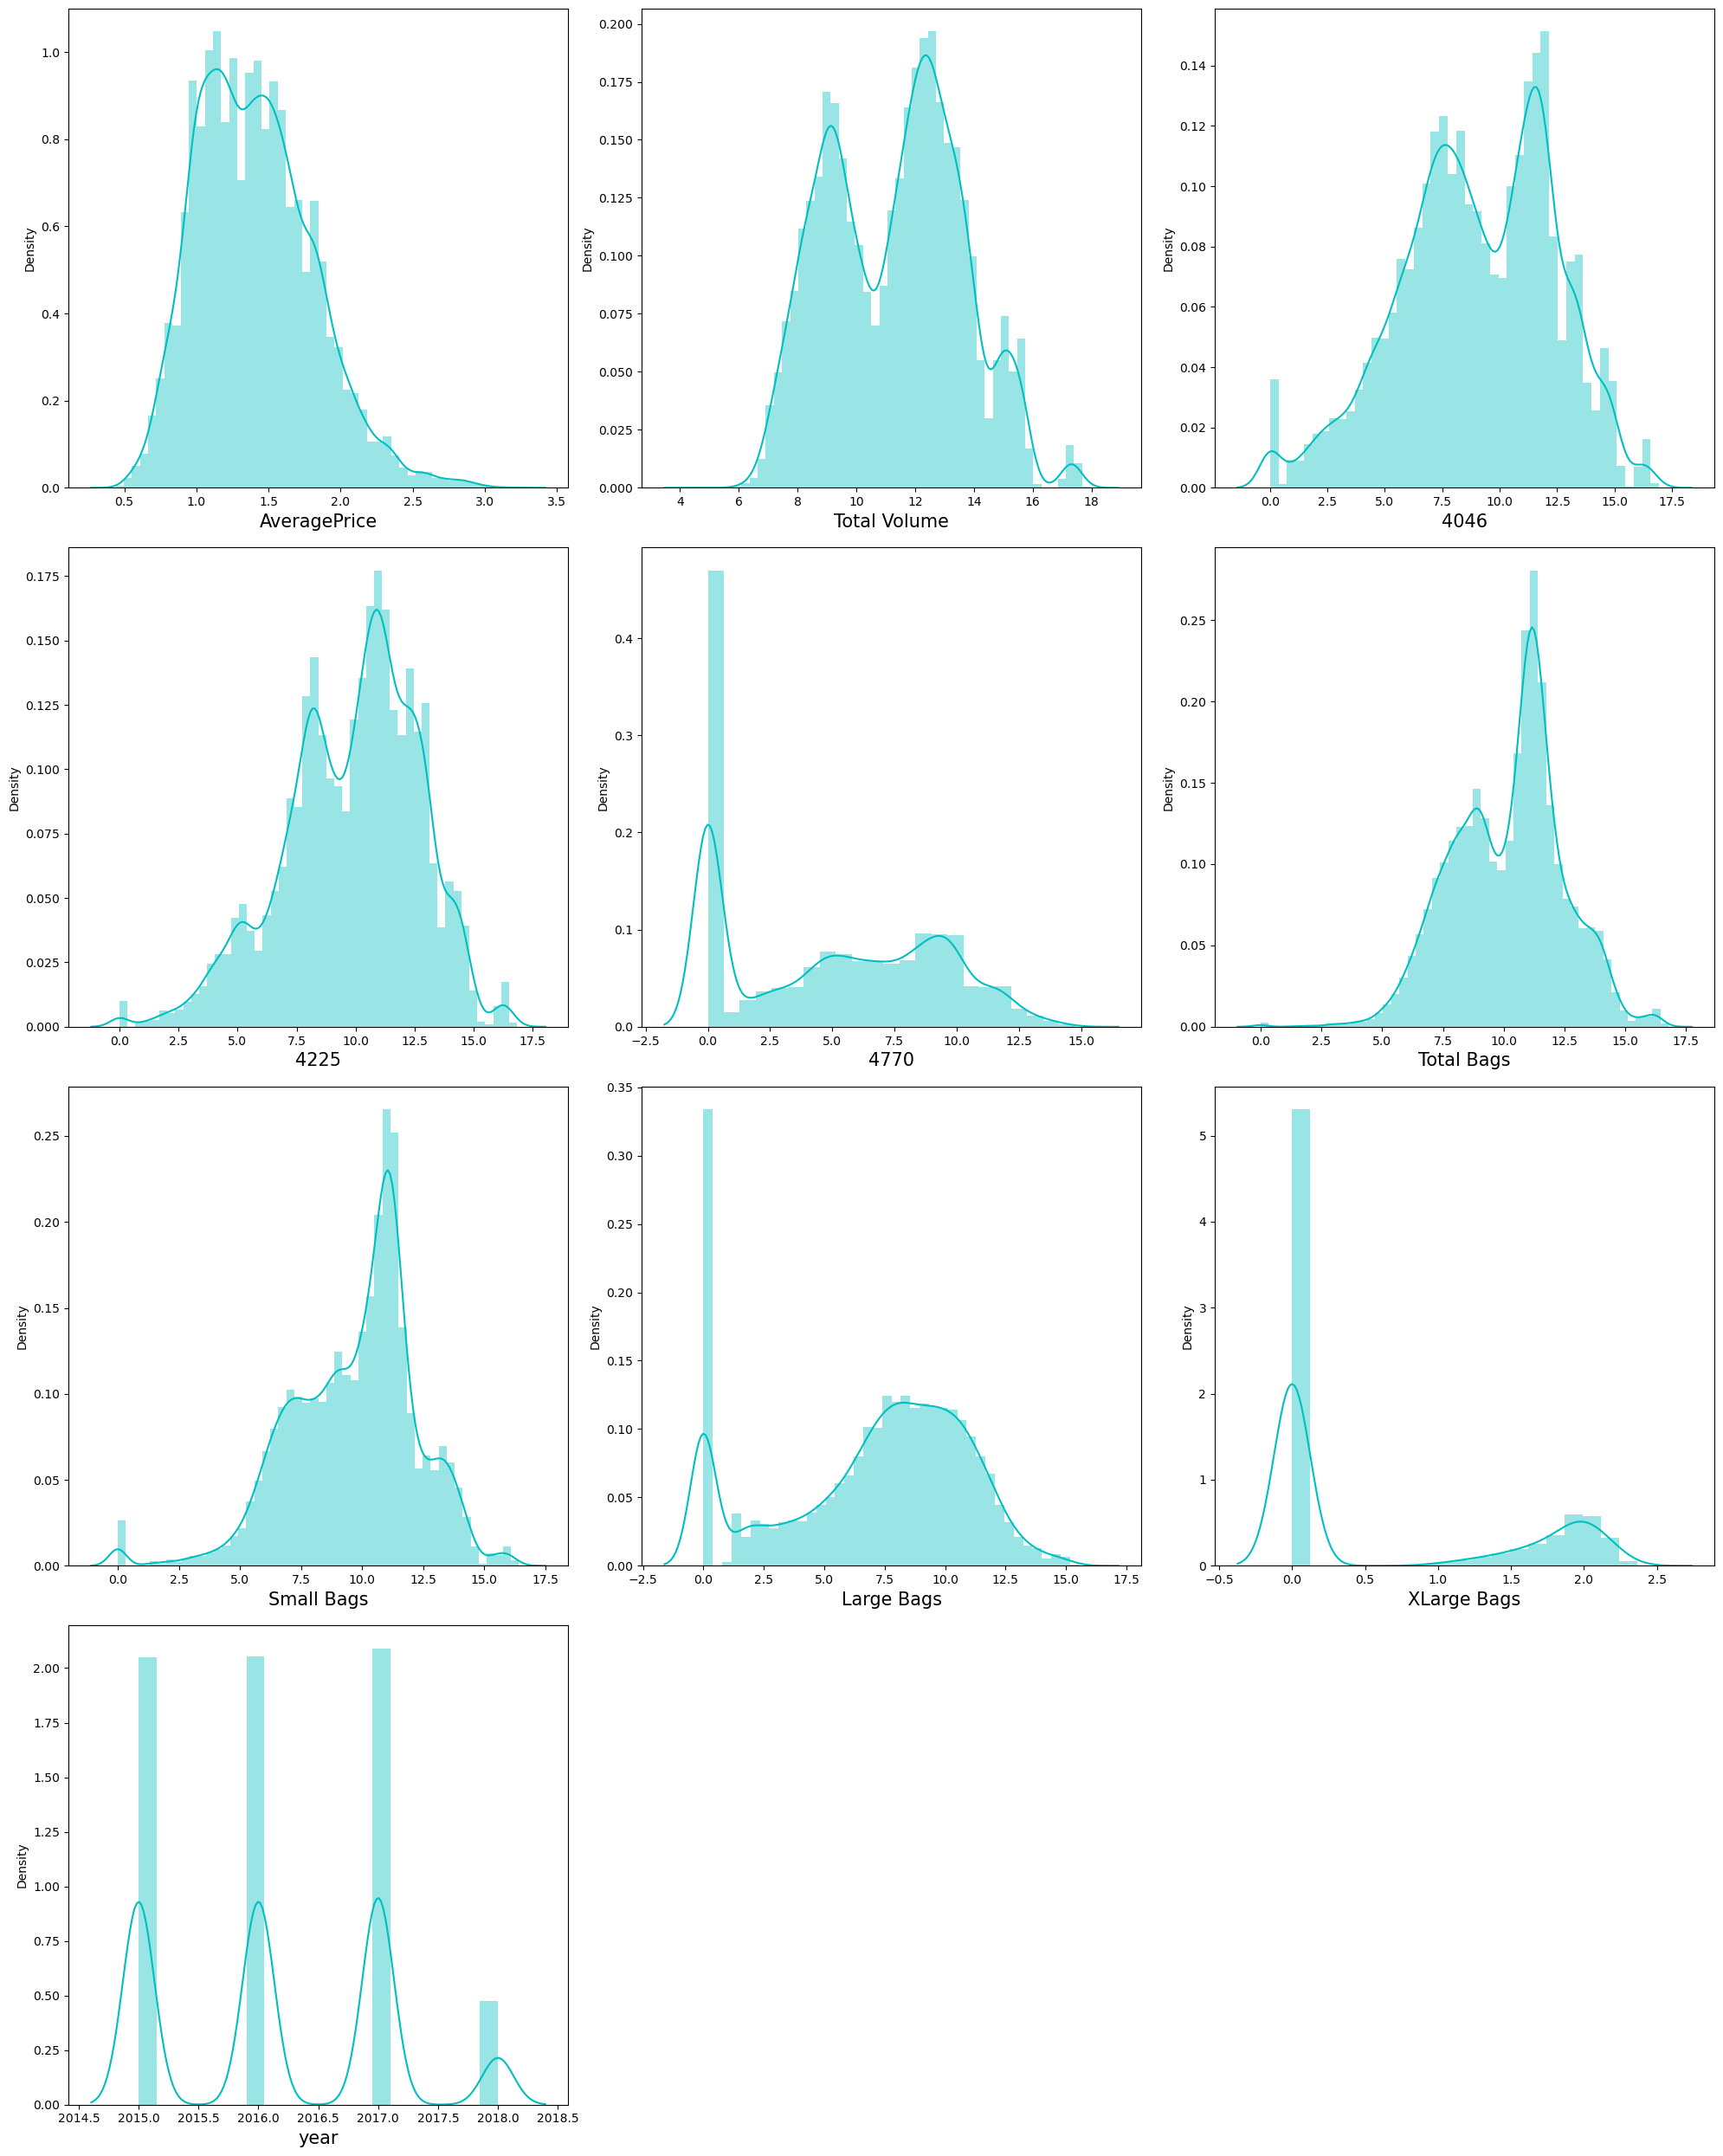

In [31]:
# Again visualizing data after removing skewness
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_col:
    if plotnumber <= 12:
        plt.subplot(4, 3, plotnumber)
        sns.distplot(df_price[i], color ='c')
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.tight_layout()

In [32]:
# Removing outliers using IQR method

df_iqr =df_price[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

Q1 =df_iqr.quantile(0.25)
Q3 =df_iqr.quantile(0.75)

IQR =Q3-Q1

# For Higher side
for i in df_iqr:
    high_iqr =Q1[i] + (1.5* IQR[i])
    high_index =np.where(df_iqr[i] > high_iqr)
    df_iqr.drop(df_iqr.index[high_index], inplace =True)
    
# For lower side
for i in df_iqr:
    low_iqr =Q3[i] - (1.5 * IQR[i])
    low_index =np.where(df_iqr[i] < low_iqr)
    df_iqr.drop(df_iqr.index[low_index], inplace =True)

In [33]:
# Removing outliers using zscore
df_zscore =df_price[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

z =np.abs(zscore(df_zscore))
df_zscore =df_zscore[(z < 3).all(axis =1)]
df_zscore

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
8156,0.88,11.638946,9.852566,10.565001,5.041423,10.924468,10.814785,8.645020,1.647544
5477,1.09,17.341693,16.346112,16.159331,13.242348,16.161937,15.956032,14.394942,2.288052
8307,1.58,12.651624,12.071160,10.775337,4.221564,11.403344,10.939993,10.410691,1.465123
14356,1.44,11.053515,9.671024,9.255010,6.049214,10.503351,10.294430,8.835055,0.000000
15239,2.06,9.292223,5.404837,8.466740,0.000000,8.667327,8.245009,7.602092,0.000000
...,...,...,...,...,...,...,...,...,...
810,1.20,14.963457,13.410838,14.206861,12.544207,13.494038,13.293277,11.694590,2.109700
14052,2.07,8.934327,7.099359,8.706843,0.000000,5.816248,5.806279,1.465568,0.000000
9095,1.08,17.418557,16.400470,16.166116,13.223060,16.333388,16.015327,14.963281,2.310598
17887,1.54,8.226266,0.000000,7.090835,0.000000,7.839502,7.479266,6.645091,0.000000


In [34]:
# Calculating data loss after removing outliers using IQR and zscore

print("Shape of original dataset :", df_price.shape[0])
print('\n')
print("Shape of dataset after using IQR method :",df_iqr.shape[0])
print("Data loss :", ((df_price.shape[0] - df_iqr.shape[0])/df_price.shape[0])*100)
print("Shape of dataset after using zscore method :",df_zscore.shape[0])
print("Data loss :", ((df_price.shape[0] - df_zscore.shape[0])/df_price.shape[0])*100)

Shape of original dataset : 18249


Shape of dataset after using IQR method : 9590
Data loss : 47.44917529727656
Shape of dataset after using zscore method : 17840
Data loss : 2.2412186969148995


In [35]:
# Dropping data column as it will not have any impact on label prediction
df_price.drop(columns =['Date'], inplace =True)

In [36]:
# We will remove outliers using zscore as data loss is less as compared to IQR method

df_price =df_price[(z < 3).all(axis =1)]
df_price.shape

(17840, 12)

In [37]:
# Encoding Categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE =OrdinalEncoder()

for i in df_price:
    if df_price[i].dtypes =='object':
        df_price[i] =OE.fit_transform(df_price[i].values.reshape(-1, 1))
        
df_price

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8156,0.88,11.638946,9.852566,10.565001,5.041423,10.924468,10.814785,8.645020,1.647544,0.0,2017,47.0
5477,1.09,17.341693,16.346112,16.159331,13.242348,16.161937,15.956032,14.394942,2.288052,0.0,2016,51.0
8307,1.58,12.651624,12.071160,10.775337,4.221564,11.403344,10.939993,10.410691,1.465123,0.0,2017,50.0
14356,1.44,11.053515,9.671024,9.255010,6.049214,10.503351,10.294430,8.835055,0.000000,1.0,2016,46.0
15239,2.06,9.292223,5.404837,8.466740,0.000000,8.667327,8.245009,7.602092,0.000000,1.0,2017,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
810,1.20,14.963457,13.410838,14.206861,12.544207,13.494038,13.293277,11.694590,2.109700,0.0,2015,15.0
14052,2.07,8.934327,7.099359,8.706843,0.000000,5.816248,5.806279,1.465568,0.000000,1.0,2016,40.0
9095,1.08,17.418557,16.400470,16.166116,13.223060,16.333388,16.015327,14.963281,2.310598,0.0,2018,51.0
17887,1.54,8.226266,0.000000,7.090835,0.000000,7.839502,7.479266,6.645091,0.000000,1.0,2018,23.0


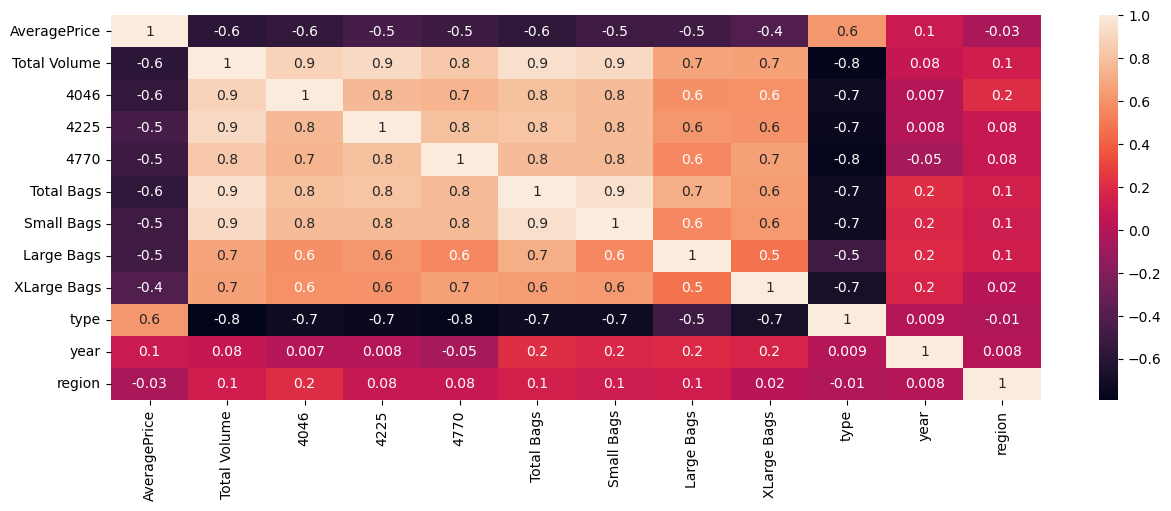

In [38]:
#Plotting heatmap
plt.figure(figsize =(15, 5))
sns.heatmap(df_price.corr(), annot =True, fmt ='.1g')
plt.show()

__Total Volume is highly correlated with 4046, 4225, Total Bags and Small Bags. We have to delete Total Volume__

In [39]:
# Deleting Total Volume
df_price.drop(columns =['Total Volume'], inplace =True)
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17840 entries, 8156 to 7270
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17840 non-null  float64
 1   4046          17840 non-null  float64
 2   4225          17840 non-null  float64
 3   4770          17840 non-null  float64
 4   Total Bags    17840 non-null  float64
 5   Small Bags    17840 non-null  float64
 6   Large Bags    17840 non-null  float64
 7   XLarge Bags   17840 non-null  float64
 8   type          17840 non-null  float64
 9   year          17840 non-null  int64  
 10  region        17840 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


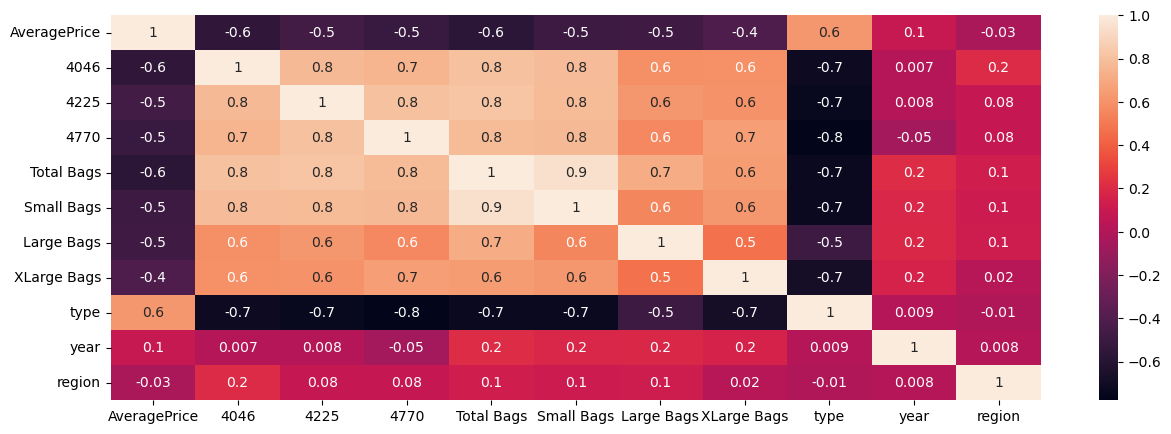

In [40]:
# Again checking heatmap
plt.figure(figsize =(15, 5))
sns.heatmap(df_price.corr(), annot =True, fmt ='.1g')
plt.show()

__Small Bags and total Bags are highly correlated. We will delete Total Bags__

In [41]:
# Deleting Total Bags
df_price.drop(columns =['Total Bags'], inplace =True)
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17840 entries, 8156 to 7270
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17840 non-null  float64
 1   4046          17840 non-null  float64
 2   4225          17840 non-null  float64
 3   4770          17840 non-null  float64
 4   Small Bags    17840 non-null  float64
 5   Large Bags    17840 non-null  float64
 6   XLarge Bags   17840 non-null  float64
 7   type          17840 non-null  float64
 8   year          17840 non-null  int64  
 9   region        17840 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.5 MB


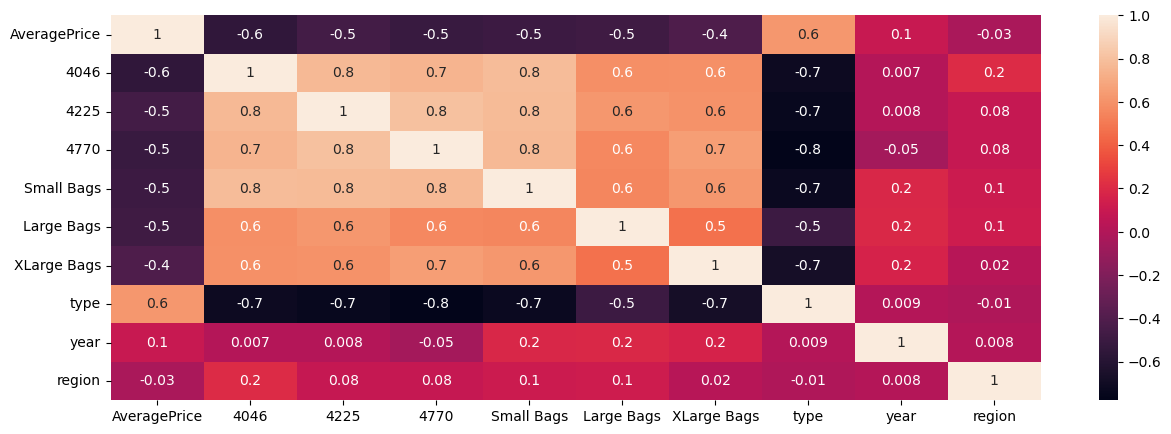

In [42]:
# Again checking heatmap
plt.figure(figsize =(15, 5))
sns.heatmap(df_price.corr(), annot =True, fmt ='.1g')
plt.show()

In [43]:
# Seperating Label and features
x =df_price.drop(columns ='AveragePrice')
y =df_price[['AveragePrice']]

In [44]:
# Standardizing dataset using StandardScaler

scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.238436,0.235377,-0.025675,0.411598,0.384035,1.131589,-0.977166,0.897460,1.327724
1,2.172818,2.235529,1.953488,2.568488,1.884465,1.849650,-0.977166,-0.166161,1.584627
2,0.899340,0.310579,-0.223534,0.464126,0.844783,0.927081,-0.977166,0.897460,1.520401
3,0.184356,-0.232987,0.217540,0.193295,0.433624,-0.715441,1.023367,-0.166161,1.263498
4,-1.086511,-0.514819,-1.242342,-0.666491,0.111885,-0.715441,1.023367,0.897460,-1.112855
...,...,...,...,...,...,...,...,...,...
17835,1.298420,1.537459,1.785003,1.451391,1.179814,1.649702,-0.977166,-1.229782,-0.727501
17836,-0.581725,-0.428975,-1.242342,-1.689603,-1.489429,-0.715441,1.023367,-0.166161,0.878143
17837,2.189011,2.237955,1.948833,2.593364,2.032772,1.874925,-0.977166,1.961081,1.584627
17838,-2.696574,-1.006749,-1.242342,-0.987741,-0.137843,-0.715441,1.023367,1.961081,-0.213695


In [45]:
# Checking variance inflaction factor
vif =pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature'] =x.columns
vif

,VIF Values,Feature
0,3.643434,4046
1,3.972999,4225
2,4.222950,4770
3,4.040473,Small Bags
4,1.835387,Large Bags
5,2.151617,XLarge Bags
6,3.391655,type
7,1.293020,year
8,1.090823,region


__VIF score for all the columns are less than 5, so do not need to delete any columns.__ 

# EDA part completed. 

## Model Building

In [46]:
# Initializing models
RFR =RandomForestRegressor()
ETR =ExtraTreesRegressor()
LR =LinearRegression()
svr =SVR()
GBR =GradientBoostingRegressor()
ADR =AdaBoostRegressor()
BR =BaggingRegressor()
DTR =DecisionTreeRegressor()
lasso =Lasso()
ridge =Ridge()

In [47]:
# Finding best random state
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    LR =LinearRegression()
    LR.fit(x_train, y_train)
    pred =LR.predict(x_test)
    acc =r2_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum accuracy is :", maxacc, "at random state :", maxrs)

Maximum accuracy is : 0.4996074830598384 at random state : 116


In [48]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [49]:
# Model Building
models ={'RandomForestRegressor': RFR,
        'ExtraTreesRegressor': ETR,
        'LinearRegressor': LR,
        'SVR': svr,
        'GradientBoostingRegressor': GBR,
        'AdaBoostRegressor': ADR,
        'BaggingRegressor': BR,
        'DecisionTreeRegressor': DTR,
         'Lasso': lasso,
         'Ridge': ridge
        }

for name, model in models.items():
    model.fit(x_train, y_train)
    pred_train =model.predict(x_train)
    pred_test =model.predict(x_test)
    acc =r2_score(y_test, pred)
    
    print("Model Name :", name)
    print('*'*20)
    print('R2 Score on training data : ', (r2_score(y_train, pred_train))*100)
    print('R2 Score on test data :', (r2_score(y_test, pred_test))*100)
    print("Mean Absolute Error :", mean_absolute_error(y_test, pred_test))
    print("Mean Squared Error :", mean_squared_error(y_test, pred_test))
    print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test, pred_test)))
    
    print('\n')
    print("Cross Validation :")
    print("*"*20)
    score =cross_val_score(model, x, y, cv =5)
    print(score)
    print(score.mean())
    print("Difference between R2 score and cross validation is :", (r2_score(y_test, pred_test) - score.mean())*100)
    print('='*80)
    print('\n')

Model Name : RandomForestRegressor
********************
R2 Score on training data :  97.77392878868912
R2 Score on test data : 84.17446177289649
Mean Absolute Error : 0.10845171898355756
Mean Squared Error : 0.023726554607623317
Root Mean Squared Error : 0.15403426439472262


Cross Validation :
********************
[0.84957203 0.84564842 0.84874074 0.8413323  0.85368131]
0.8477949603306681
Difference between R2 score and cross validation is : -0.6050342601703229


Model Name : ExtraTreesRegressor
********************
R2 Score on training data :  100.0
R2 Score on test data : 86.70014601994446
Mean Absolute Error : 0.09798516442451419
Mean Squared Error : 0.019939903920029894
Root Mean Squared Error : 0.1412087246597387


Cross Validation :
********************
[0.87729406 0.87413249 0.87024952 0.86295943 0.87719601]
0.8723663023115746
Difference between R2 score and cross validation is : -0.5364842112130064


Model Name : LinearRegressor
********************
R2 Score on training data :

__ExtraTreesRegressor is our best model with the accuracy of 86.70%.__

### Hyperparameter tunning

In [50]:
parameter ={'n_estimators' :[10, 20],
           'criterion': ['squared_error', 'friedman_mse'],
           'max_depth': [2, 8, 16],
           'min_samples_split' :[2, 4, 6],
           'min_samples_leaf' :[1, 2],
           'max_features' :['sqrt', 'log2']
           }

In [51]:
GCV =GridSearchCV(ExtraTreesRegressor(), parameter, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [2, 8, 16],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20]})

In [52]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 16,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [58]:
ETR =ExtraTreesRegressor(criterion ='friedman_mse',
 max_depth =20,
 max_features = 'log2',
 min_samples_leaf =1,
 min_samples_split =2,
 n_estimators =80)

ETR.fit(x_train, y_train)
pred =ETR.predict(x_test)
acc =r2_score(y_test, pred)
print("Accuracy is:", acc*100)

Accuracy is: 84.99301433082297


__Accuracy is not improved after hyperparameter tunning.__

In [54]:
# Our Final model is ExtraTreeRegressor()

Final_model =ExtraTreesRegressor()
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =r2_score(y_test, pred)
print("Accuracy is :", acc*100)

Accuracy is : 86.77243596210035


In [55]:
# Saving Model
pickle.dump(Final_model, open('Avacado_price.pkl', 'wb'))

In [56]:
# Loading the Model
loaded_model =pickle.load(open('Avacado_price.pkl', 'rb'))
pred =loaded_model.predict(x_test)
result =loaded_model.score(x_test, y_test)
print(result*100)


86.77243596210035


In [57]:
#Comparing Actual Vs Predicted
act =np.array(y_test)
df1 =pd.DataFrame()
df1['Predicted'] =pred
df1['Actual'] =act
df1

,Predicted,Actual
0,1.6265,1.59
1,0.9993,0.70
2,1.6501,1.14
3,1.2030,1.17
4,1.7281,1.66
...,...,...
5347,0.9398,0.94
5348,1.4692,1.61
5349,1.0320,1.03
5350,1.5734,1.57


# Find the region (Classification Problem)

In [191]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pickle

import warnings
warnings.filterwarnings('ignore')

In [192]:
# Importing Dataset
df_region =pd.read_csv(r'D:\Backup\Old PC\Chandan\Data Science\Internship\Final Project\Phase-1\avocado.csv')
df_region =df_region.sample(frac =1)
df_region.head(15)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
4359,43,2016-02-28,1.15,4481119.44,105867.52,3361015.90,84168.72,930067.30,867106.18,62961.12,0.00,conventional,2016,Northeast
6376,18,2017-08-27,1.74,112023.41,1978.65,45102.68,25971.21,38970.87,26953.30,3478.91,8538.66,conventional,2017,GrandRapids
4595,19,2016-08-14,1.42,93415.78,1543.89,52111.73,1001.96,38758.20,29043.13,8460.07,1255.00,conventional,2016,Pittsburgh
1086,46,2015-02-08,1.21,91840.75,62181.18,9886.68,375.65,19397.24,11016.44,8380.80,0.00,conventional,2015,Jacksonville
2961,49,2016-01-17,1.17,836225.86,58788.02,535244.92,25662.38,216530.54,213938.82,2591.72,0.00,conventional,2016,BaltimoreWashington
17838,9,2018-01-21,1.48,9495.46,281.81,1266.88,0.00,7884.46,4149.72,3734.74,0.00,organic,2018,Indianapolis
2781,25,2015-07-05,0.78,913360.72,606650.91,123465.83,18233.51,165010.47,146199.35,18811.12,0.00,conventional,2015,WestTexNewMexico
1018,30,2015-05-31,1.37,142817.83,13199.86,80053.62,6630.76,42933.59,26714.31,15126.47,1092.81,conventional,2015,Indianapolis
7269,10,2017-10-22,1.56,328326.17,214853.32,27481.16,613.49,85378.20,50444.75,34933.45,0.00,conventional,2017,Orlando
3617,29,2016-06-05,1.01,4188245.99,467971.13,2147776.06,487106.11,1085392.69,776263.67,220019.19,89109.83,conventional,2016,GreatLakes


In [193]:
# Checking dataset shape
df_region.shape

(18249, 14)

In [194]:
# Deleting 1st and 2nd column
df_region.drop(columns =['Unnamed: 0'], inplace =True)
df_region.drop(columns =[], inplace =True)

In [195]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 4359 to 8003
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [196]:
# Changing Date to datetime format
df_region['Date'] =pd.to_datetime(df_region['Date'], format ='%Y-%m-%d')
df_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 4359 to 8003
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


__There is no null value present in the dataset.__

In [197]:
df_region.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,2016-08-13 23:30:43.498274048,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
min,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938


In [198]:
# Checking duplicate columns in the dataset
print("No. Duplicate columns :", df_region.duplicated().sum())

No. Duplicate columns : 0


__No duplicate record present in the dataset.__

In [199]:
# Shape of dataset
df_region.shape

(18249, 13)

In [200]:
# Checking count of each column
for i in df_region:
    print(df_region[i].value_counts())

Date
2016-02-28    108
2017-12-17    108
2018-01-14    108
2017-05-07    108
2018-02-25    108
             ... 
2016-09-04    108
2017-09-03    108
2015-12-06    107
2017-06-18    107
2017-06-25    107
Name: count, Length: 169, dtype: int64
AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.17      1
2.68      1
0.46      1
2.90      1
2.95      1
Name: count, Length: 259, dtype: int64
Total Volume
3288.85       2
4103.97       2
569349.05     2
7223.46       2
2858.31       2
             ..
2672.99       1
773218.13     1
8047.41       1
508174.09     1
4951756.35    1
Name: count, Length: 18237, dtype: int64
4046
0.00          242
3.00           10
1.24            8
4.00            8
1.00            8
             ... 
73604.41        1
146119.00       1
665032.82       1
3687.73         1
2460827.88      1
Name: count, Length: 17702, dtype: int64
4225
0.00         61
1.30          3
215.36        3
94.74         3
177.87        3
             ..

In [201]:
# Seperating numerical and categorical columns

# Seperating Numerical columnns
num_col =[]
for i in df_price.dtypes.index:
    if df_region[i].dtypes =='float64' or df_region[i].dtypes =='int64':
        num_col.append(i)
print("Numerical columns are :", num_col)

#Seperating Categorical columns
cat_col =[]
for i in df_region.dtypes.index:
    if df_region[i].dtypes =='object':
        cat_col.append(i)
print("Categorial Columns are :", cat_col)

Numerical columns are : ['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']
Categorial Columns are : ['type', 'region']


In [202]:
# Checking number of unique values
df_region.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


# ## Visualizing Data

# ### Univariate Analysis

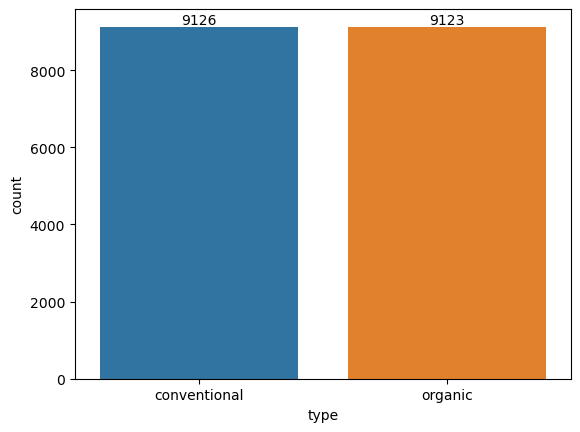

In [203]:
# Plotting type
ax =sns.countplot(x ='type', data=df_region)
ax.bar_label(ax.containers[0], fontsize =10)
plt.show()

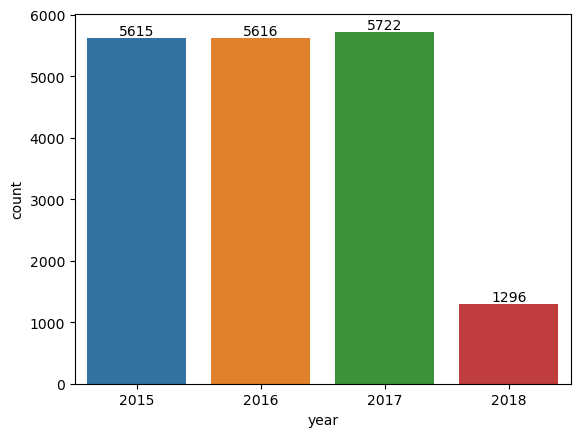

In [204]:
#Plotting year
ax =sns.countplot(x ='year', data =df_region)
ax.bar_label(ax.containers[0], fontsize =10)
plt.show()

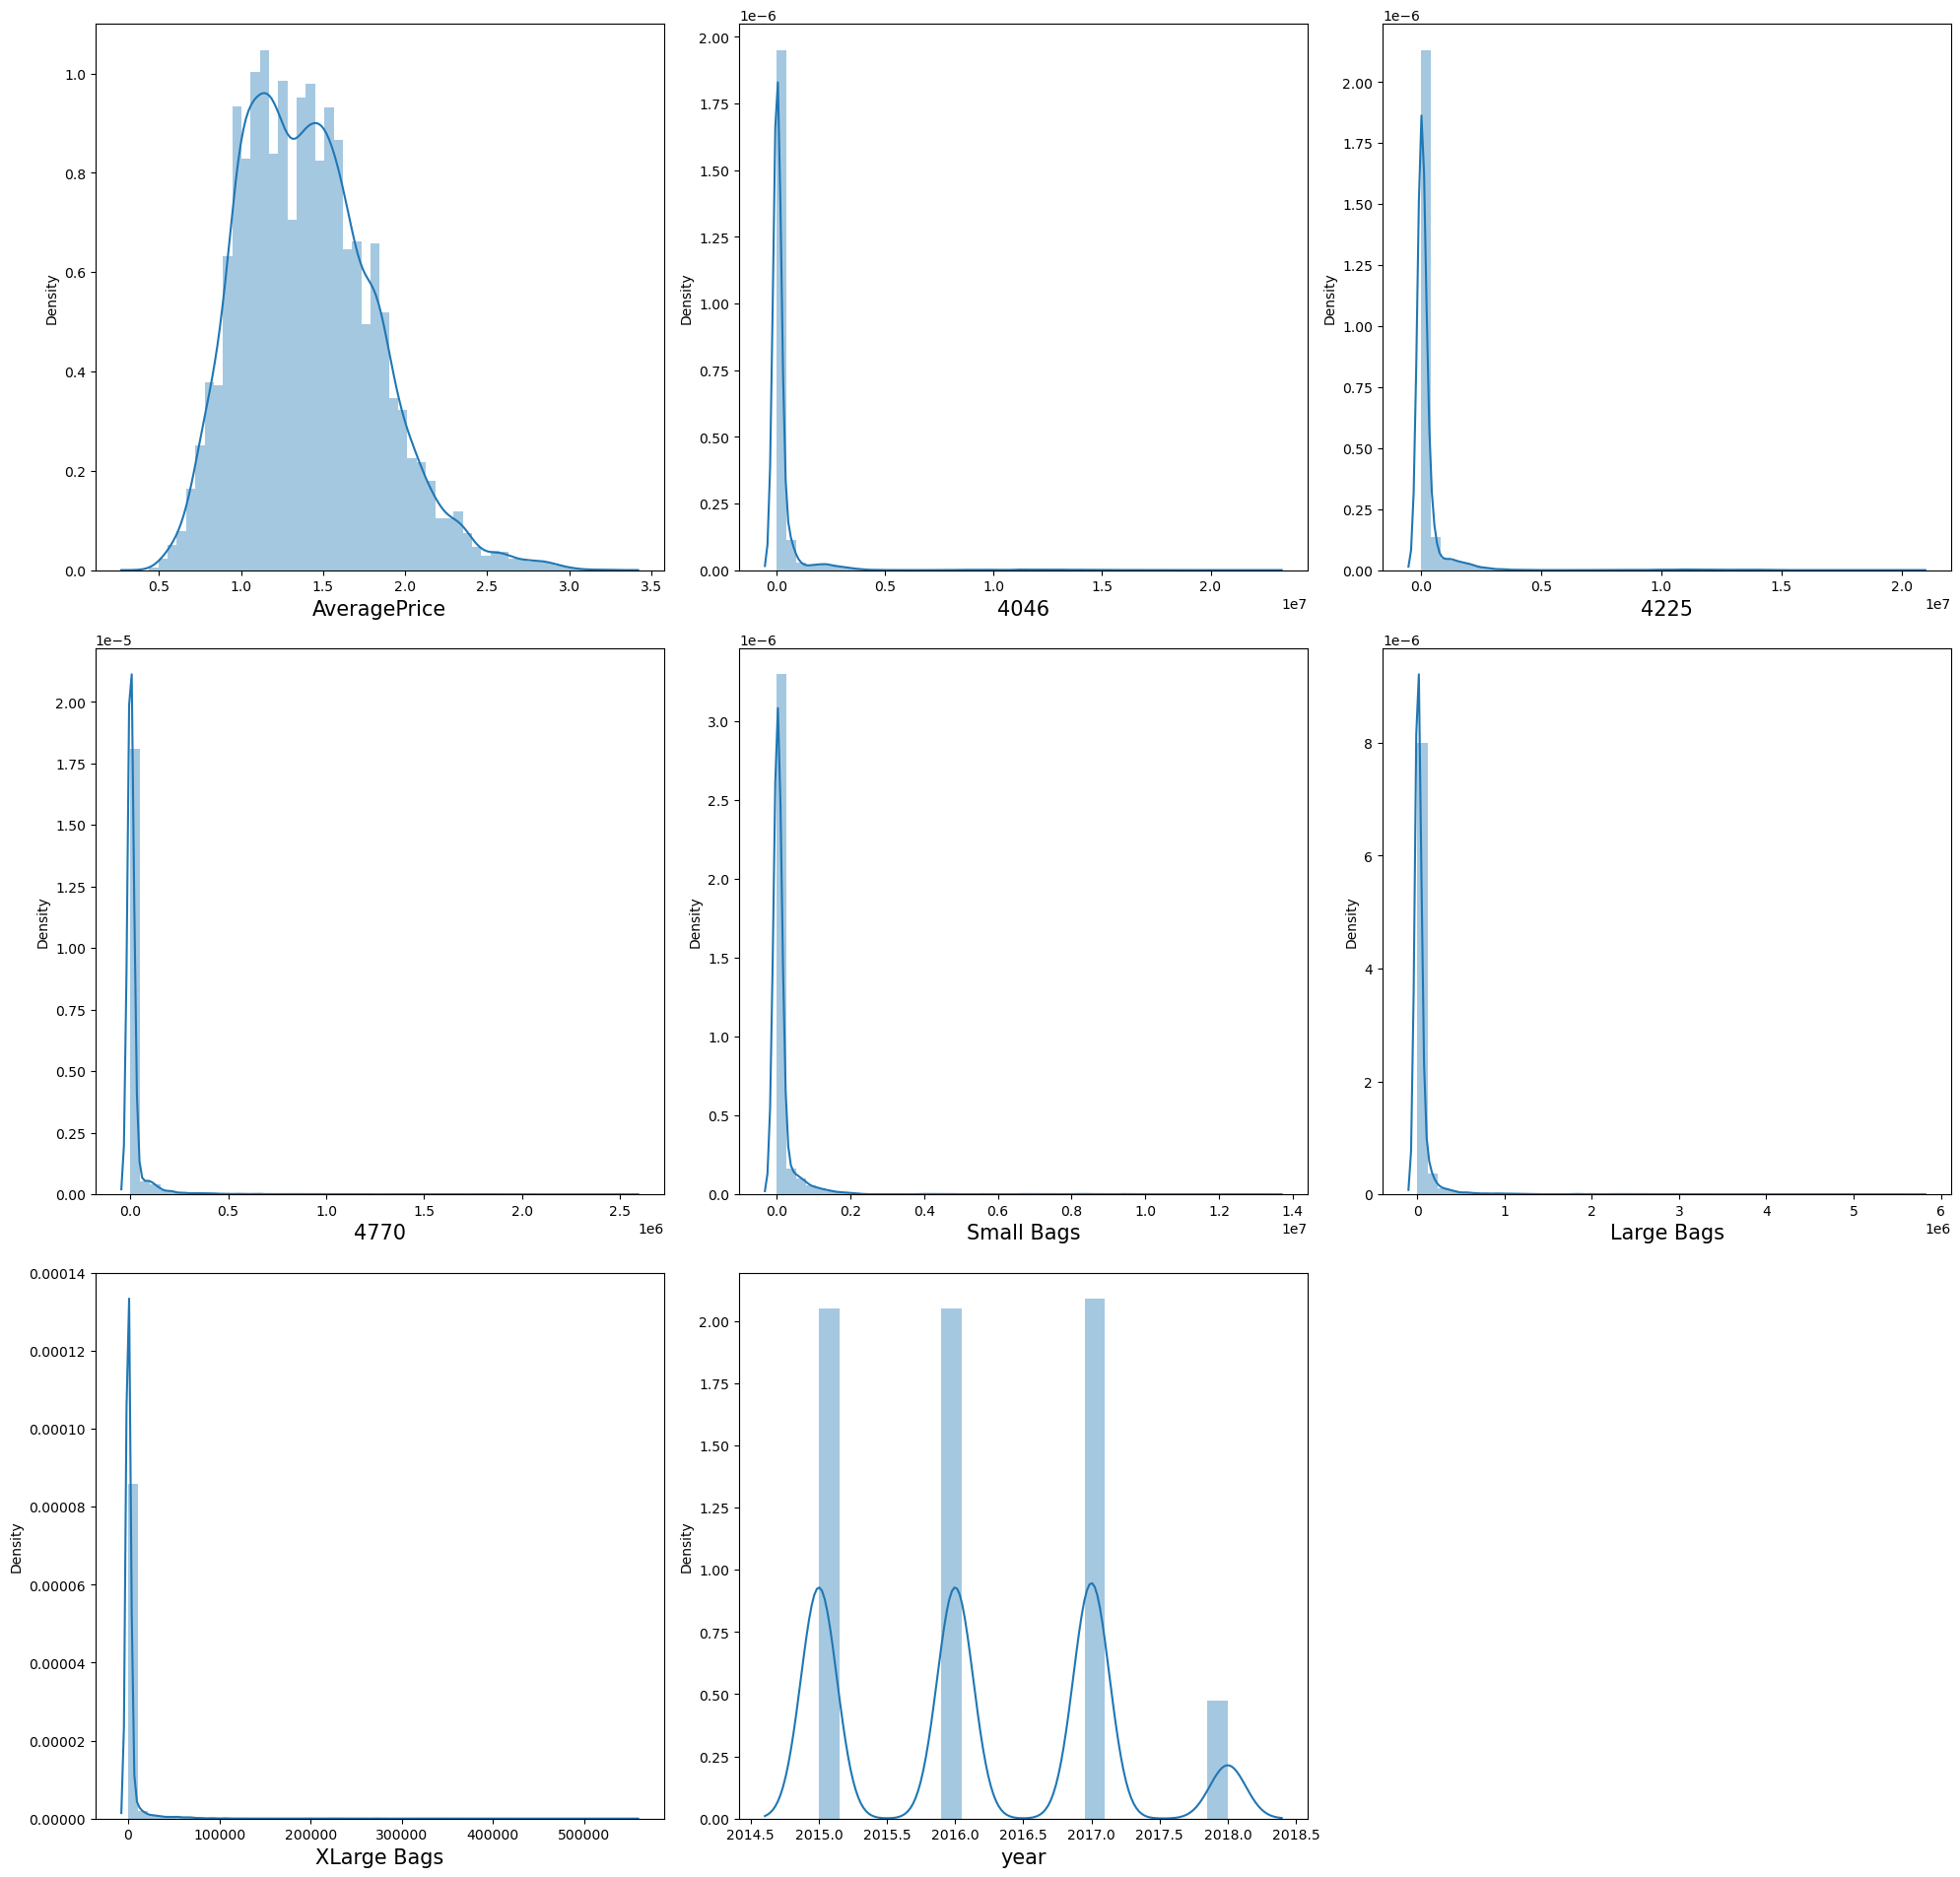

In [205]:
# Checking data distribution for numerical columns
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_col:
    if plotnumber <= 12:
        plt.subplot(4, 3, plotnumber)
        sns.distplot(df_region[i])
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.tight_layout()

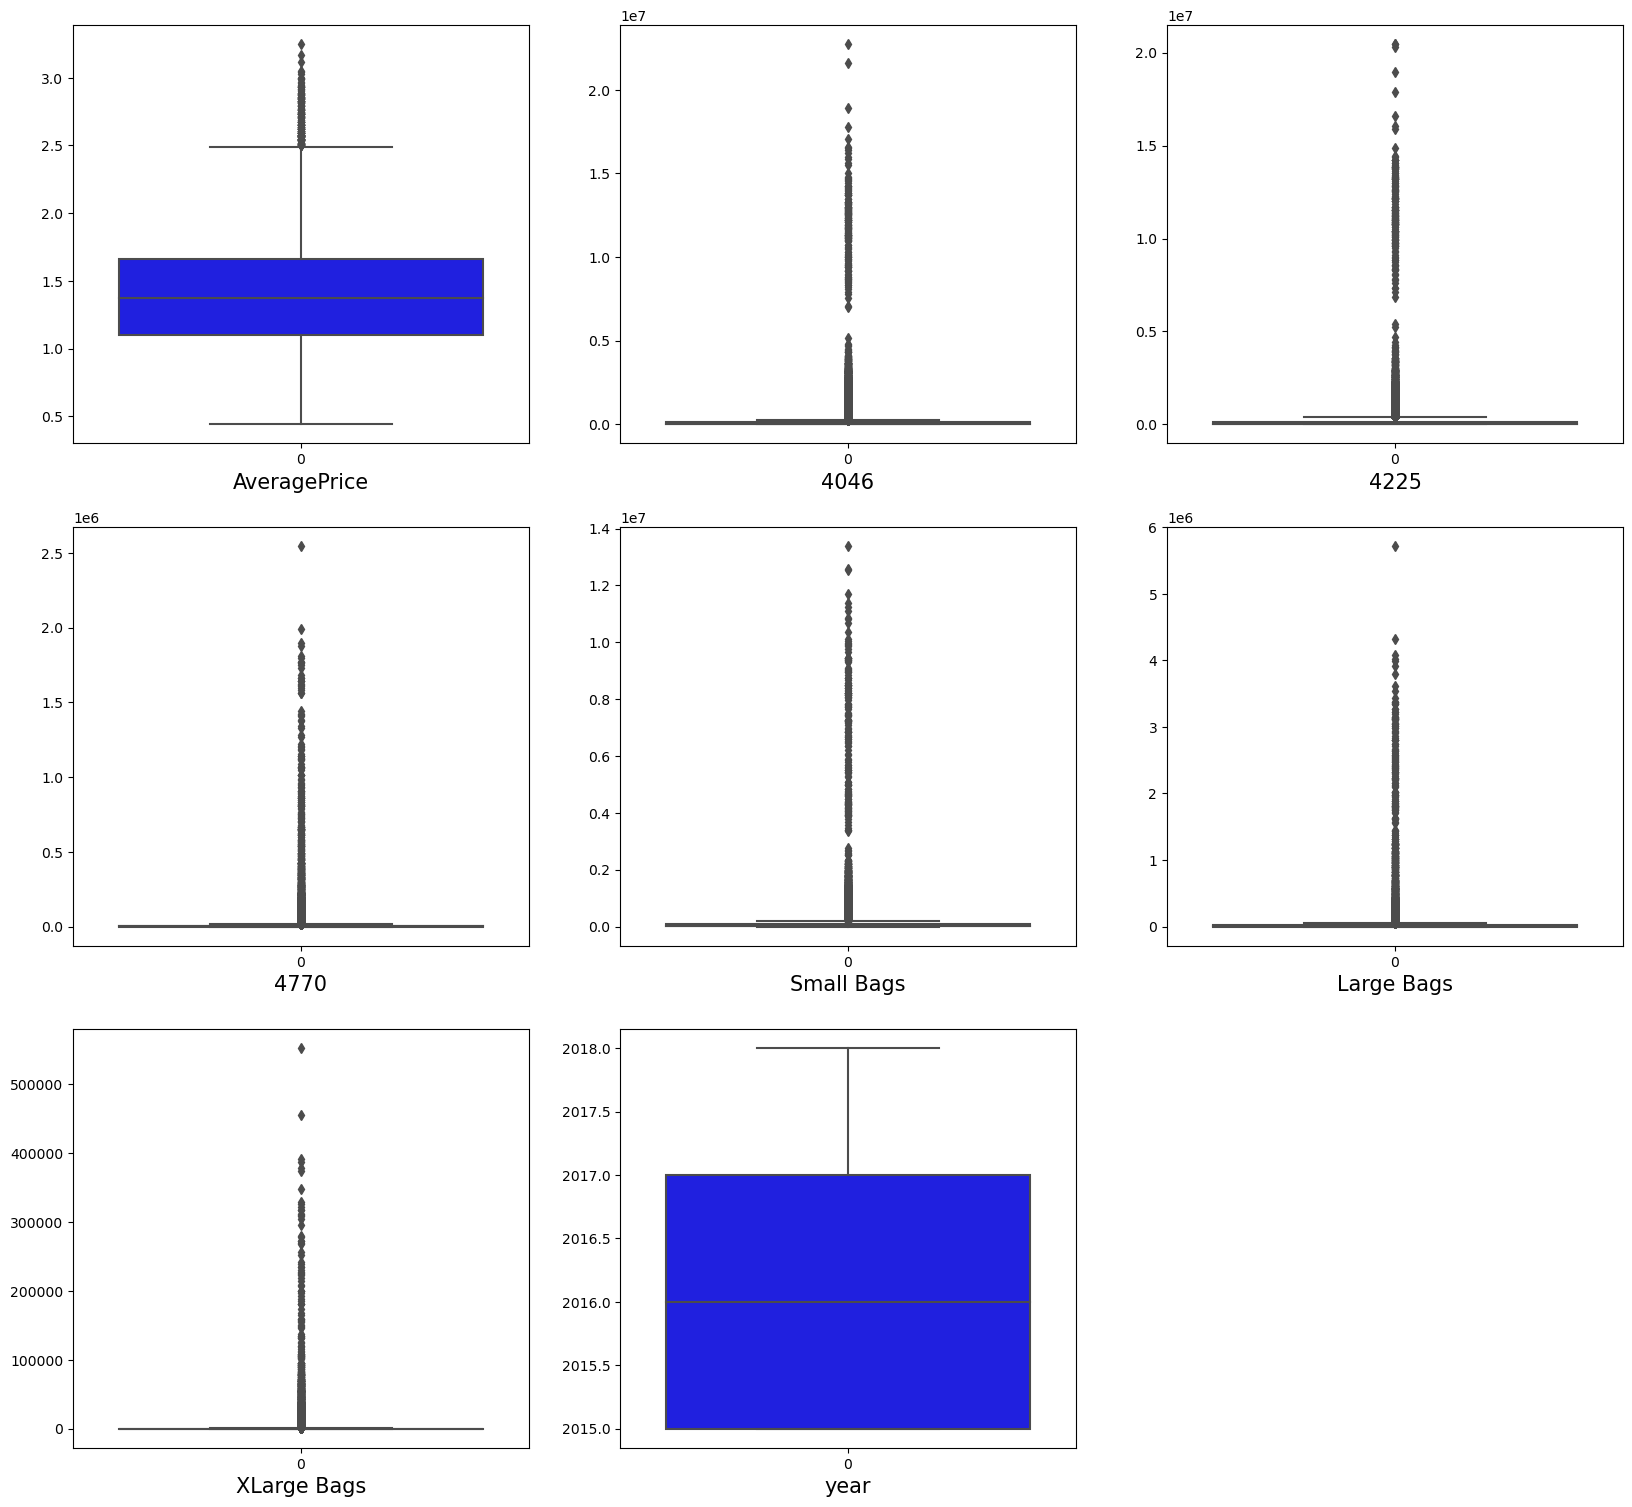

In [206]:
# Checking for outliers
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_col:
    
    if plotnumber<=12:
        plt.subplot(4, 3, plotnumber)
        sns.boxplot(df_region[i], color ='b')
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.show()

In [207]:
# Checking skewness in the dataset
df_region[num_col].skew()

AveragePrice     0.580303
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [208]:
df_region['Total Volume'] =np.log(df_region['Total Volume'])
df_region['4046'] =np.log(df_region['4046']+1)
df_region['4225'] =np.log(df_region['4225']+1)
df_region['4770'] =np.log(df_region['4770']+1)
df_region['Total Bags'] =np.log(df_region['Total Bags']+1)
df_region['Small Bags'] =np.log(df_region['Small Bags']+1)
df_region['Large Bags'] =np.log(df_region['Large Bags']+1)
df_region['XLarge Bags'] =np.log(df_region['XLarge Bags']+1)

In [209]:
# Again checking skewness
df_region[num_col].skew()

AveragePrice    0.580303
4046           -0.328195
4225           -0.486654
4770            0.099986
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
dtype: float64

In [210]:
# Again reducing skewness in the XLarge Bags column
df_region['XLarge Bags'] =np.cbrt(df_region['XLarge Bags'])

In [211]:
# Again checking skewness
df_region[num_col].skew()

AveragePrice    0.580303
4046           -0.328195
4225           -0.486654
4770            0.099986
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     0.775807
year            0.215339
dtype: float64

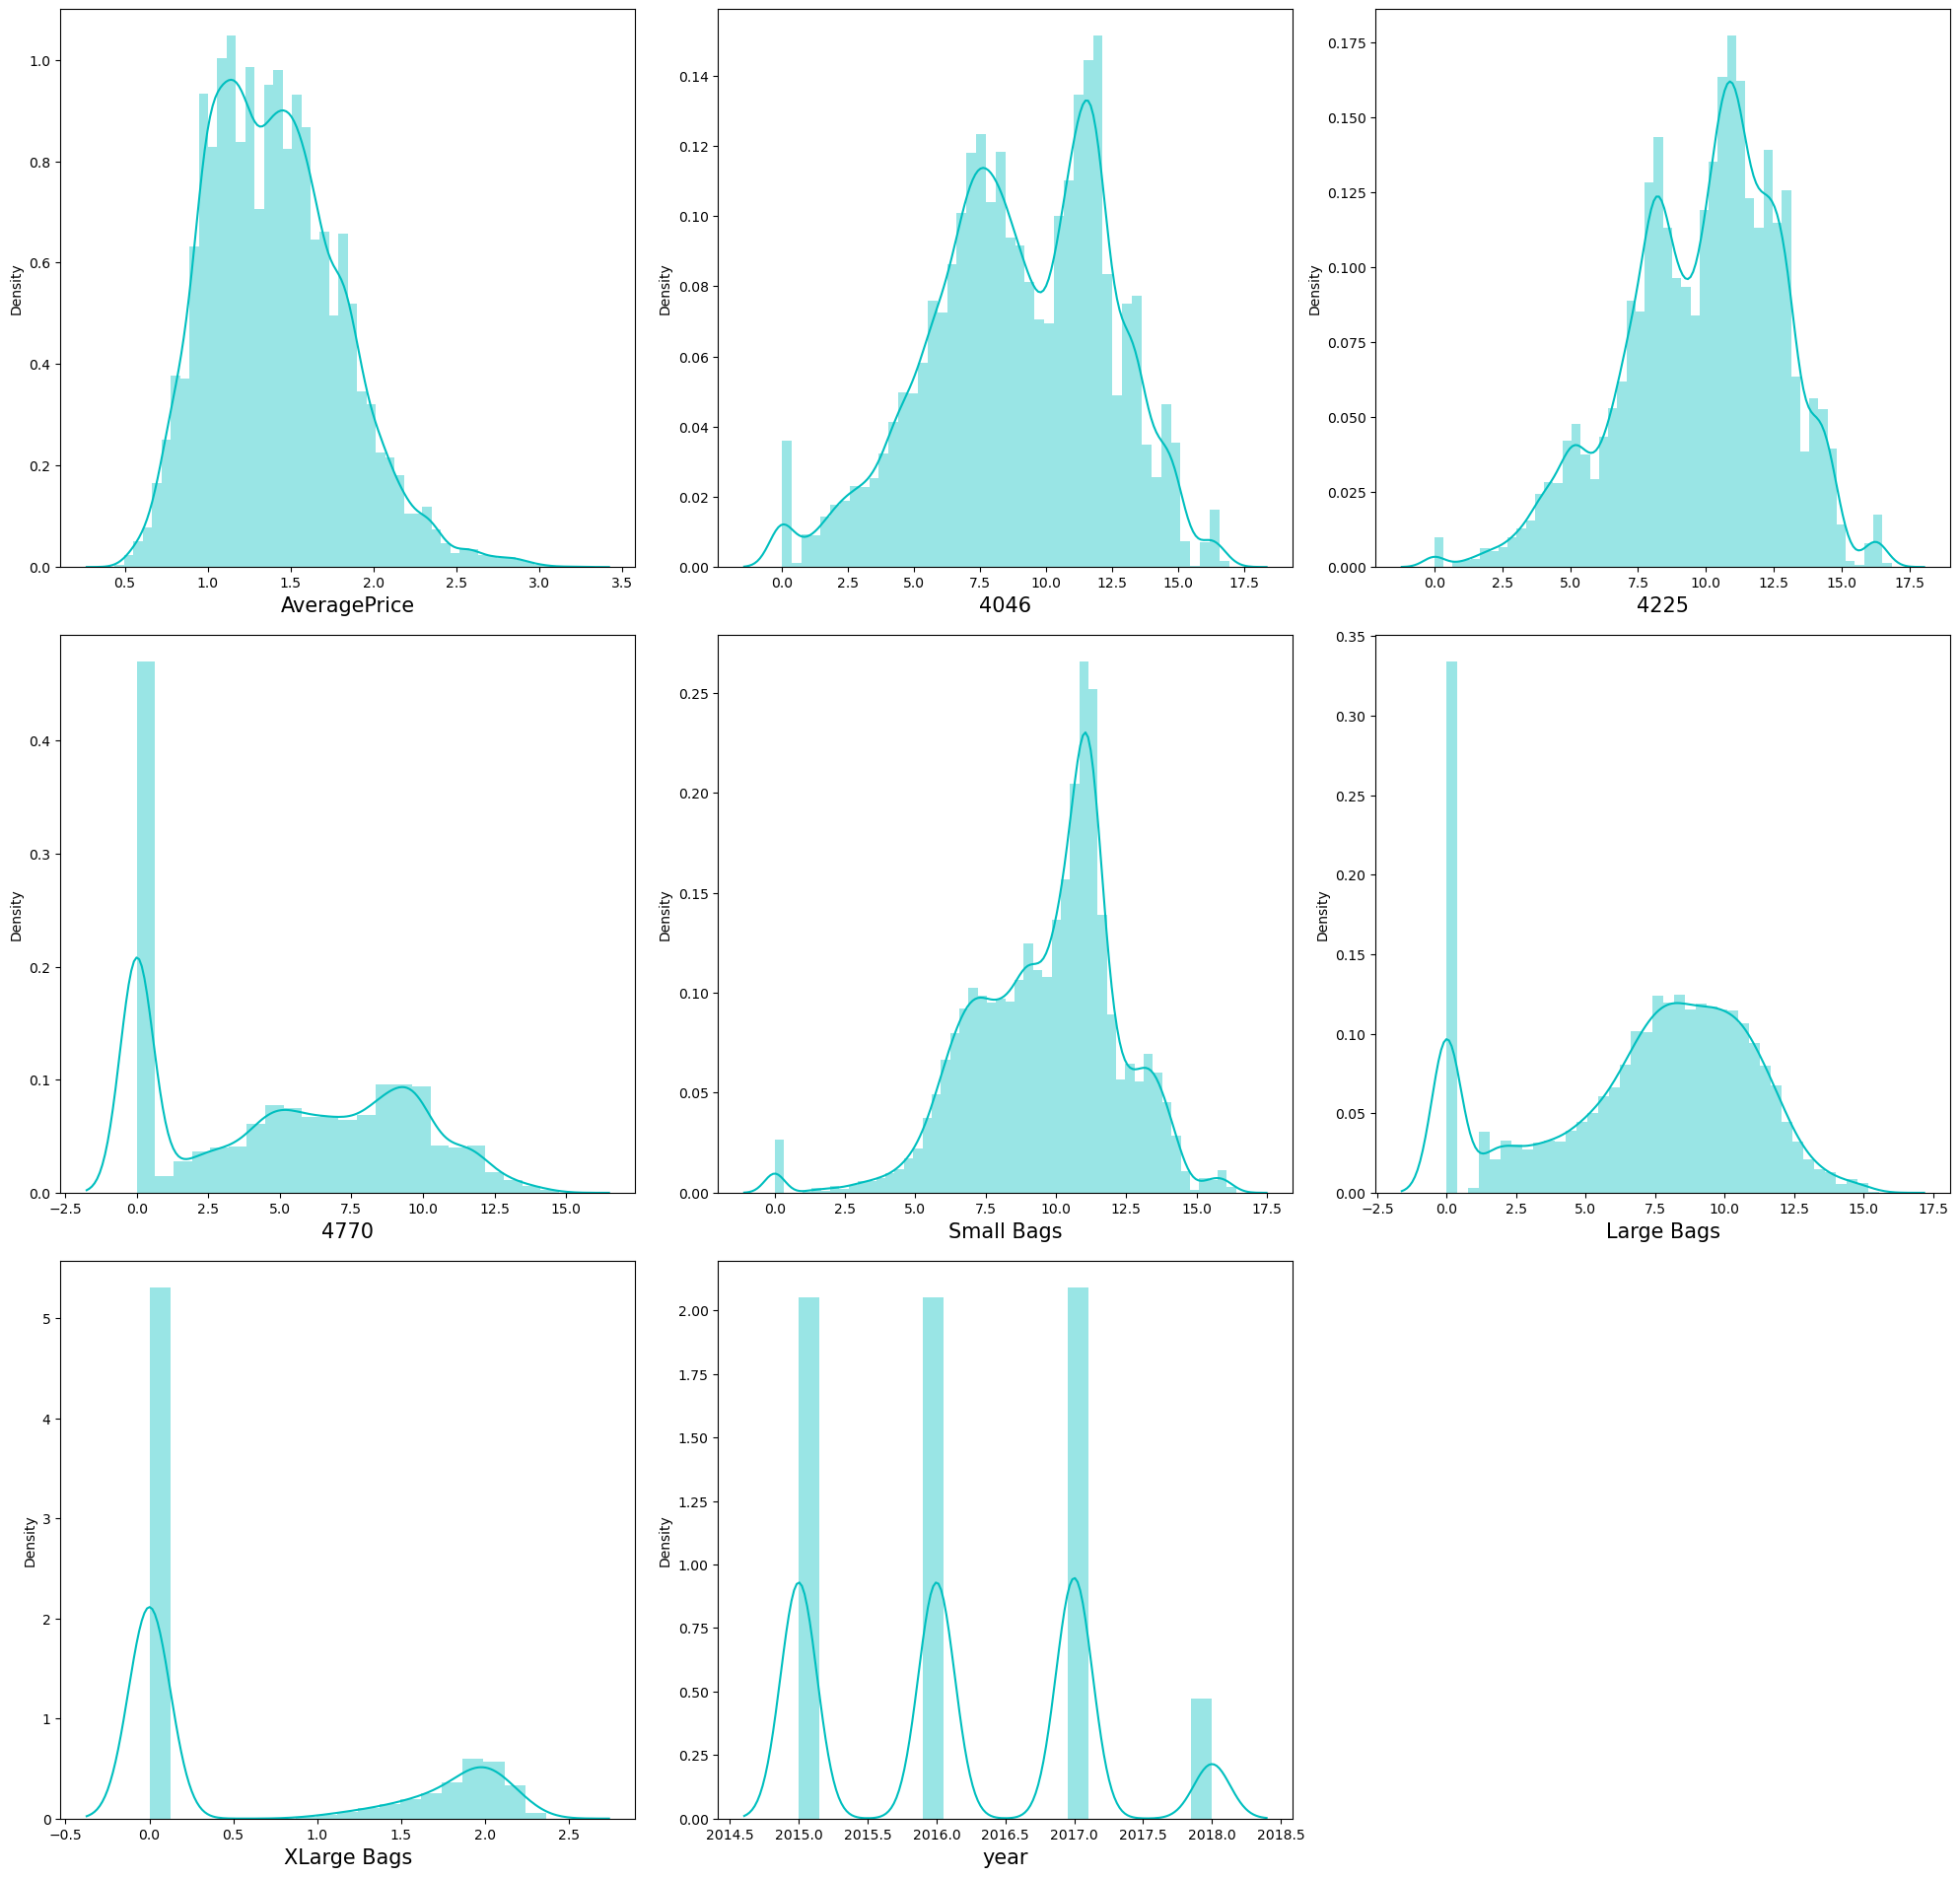

In [212]:
# Again visualizing data after removing skewness
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_col:
    if plotnumber <= 12:
        plt.subplot(4, 3, plotnumber)
        sns.distplot(df_region[i], color ='c')
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.tight_layout()

In [213]:
# Removing outliers using IQR method

df_iqr =df_region[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

Q1 =df_iqr.quantile(0.25)
Q3 =df_iqr.quantile(0.75)

IQR =Q3-Q1

# For Higher side
for i in df_iqr:
    high_iqr =Q1[i] + (1.5* IQR[i])
    high_index =np.where(df_iqr[i] > high_iqr)
    df_iqr.drop(df_iqr.index[high_index], inplace =True)
    
# For lower side
for i in df_iqr:
    low_iqr =Q3[i] - (1.5 * IQR[i])
    low_index =np.where(df_iqr[i] < low_iqr)
    df_iqr.drop(df_iqr.index[low_index], inplace =True)

In [214]:
# Removing outliers using zscore
df_zscore =df_region[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

z =np.abs(zscore(df_zscore))
df_zscore =df_zscore[(z < 3).all(axis =1)]
df_zscore

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
4359,1.15,15.315383,11.569953,15.027754,11.340591,13.743013,13.672918,11.050289,0.000000
6376,1.74,11.626463,7.590675,10.716719,10.164782,10.570595,10.201898,8.154762,2.084119
4595,1.42,11.444816,7.342708,10.861165,6.910711,10.565123,10.276572,9.043231,1.925212
1086,1.21,11.427811,11.037824,9.199045,5.931316,9.872938,9.307235,9.033818,0.000000
2961,1.17,13.636654,10.981710,13.190482,10.152820,12.285491,12.273450,7.860463,0.000000
...,...,...,...,...,...,...,...,...,...
2505,1.21,11.926810,10.866133,10.519773,3.661508,11.031988,10.943412,8.564325,0.000000
17069,1.32,10.591124,6.486085,9.241761,2.326302,10.268089,6.325988,10.248526,0.000000
8656,1.63,11.795972,7.802021,11.017477,10.325104,10.567641,10.236874,7.509396,2.089153
5709,1.32,13.002487,12.312495,10.834319,4.897467,12.044696,11.597571,10.939997,2.041818


In [215]:
# Calculating data loss after removing outliers using IQR and zscore

print("Shape of original dataset :", df_region.shape[0])
print('\n')
print("Shape of dataset after using IQR method :",df_iqr.shape[0])
print("Data loss :", ((df_price.shape[0] - df_iqr.shape[0])/df_region.shape[0])*100)
print("Shape of dataset after using zscore method :",df_zscore.shape[0])
print("Data loss :", ((df_price.shape[0] - df_zscore.shape[0])/df_region.shape[0])*100)

Shape of original dataset : 18249


Shape of dataset after using IQR method : 9590
Data loss : 45.20795660036166
Shape of dataset after using zscore method : 17840
Data loss : 0.0


In [216]:
# Dropping data column as it will not have any impact on label prediction
df_region.drop(columns =['Date'], inplace =True)

In [217]:
# We will remove outliers using zscore as data loss is less as compared to IQR method

df_region =df_region[(z < 3).all(axis =1)]
df_region.shape

(17840, 12)

In [218]:
# Encoding Categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE =OrdinalEncoder()

for i in df_region:
    if df_region[i].dtypes =='object':
        df_region[i] =OE.fit_transform(df_region[i].values.reshape(-1, 1))

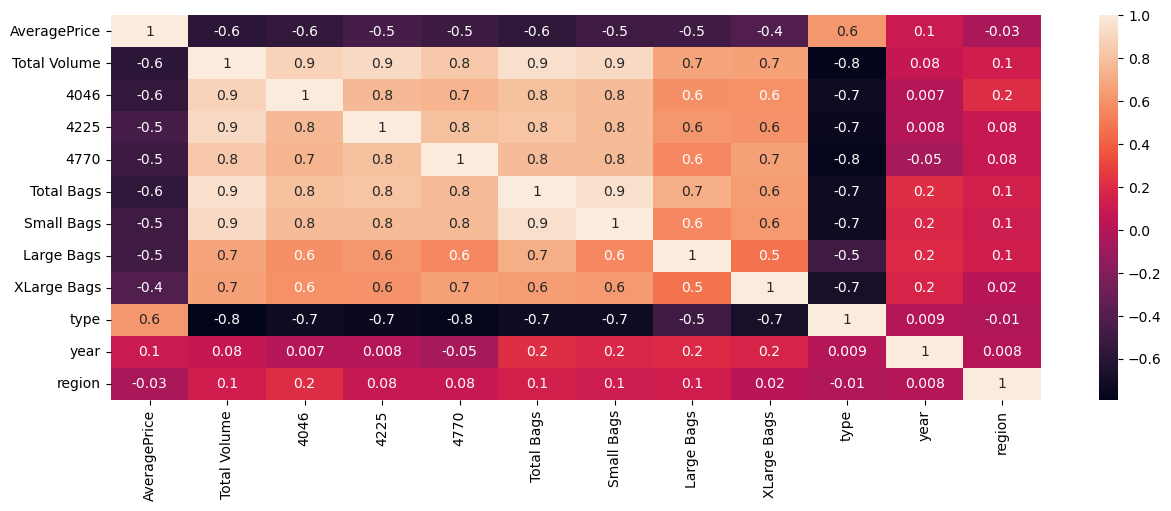

In [219]:
#Plotting heatmap
plt.figure(figsize =(15, 5))
sns.heatmap(df_region.corr(), annot =True, fmt ='.1g')
plt.show()

__Total Volume is highly correlated with 4046, 4225, Total Bags and Small Bags. We have to delete Total Volume__

In [220]:
# Deleting Total Volume
df_region.drop(columns =['Total Volume'], inplace =True)
df_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17840 entries, 4359 to 8003
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17840 non-null  float64
 1   4046          17840 non-null  float64
 2   4225          17840 non-null  float64
 3   4770          17840 non-null  float64
 4   Total Bags    17840 non-null  float64
 5   Small Bags    17840 non-null  float64
 6   Large Bags    17840 non-null  float64
 7   XLarge Bags   17840 non-null  float64
 8   type          17840 non-null  float64
 9   year          17840 non-null  int64  
 10  region        17840 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


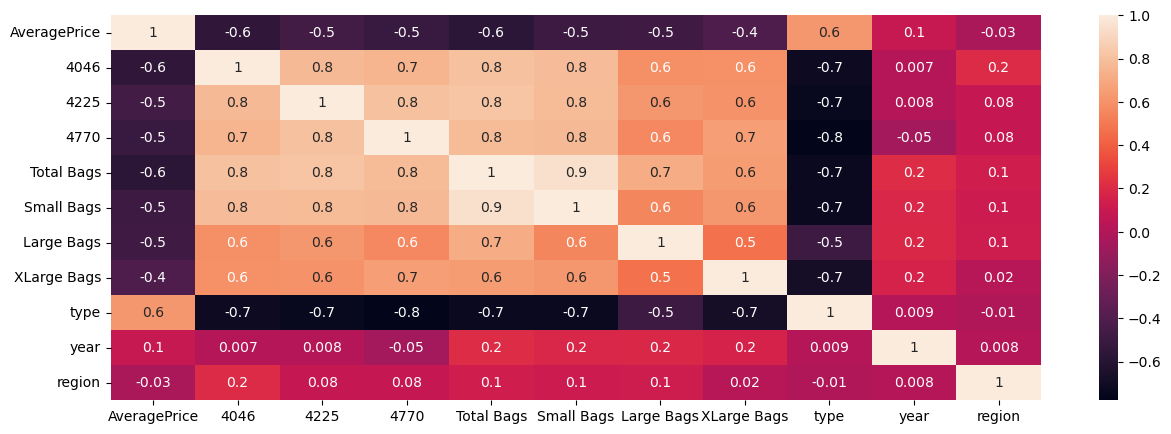

In [221]:
# Again checking heatmap
plt.figure(figsize =(15, 5))
sns.heatmap(df_region.corr(), annot =True, fmt ='.1g')
plt.show()

__Small Bags and total Bags are highly correlated. We will delete Total Bags__

In [222]:
# Deleting Total Bags
df_region.drop(columns =['Total Bags'], inplace =True)
df_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17840 entries, 4359 to 8003
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17840 non-null  float64
 1   4046          17840 non-null  float64
 2   4225          17840 non-null  float64
 3   4770          17840 non-null  float64
 4   Small Bags    17840 non-null  float64
 5   Large Bags    17840 non-null  float64
 6   XLarge Bags   17840 non-null  float64
 7   type          17840 non-null  float64
 8   year          17840 non-null  int64  
 9   region        17840 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.5 MB


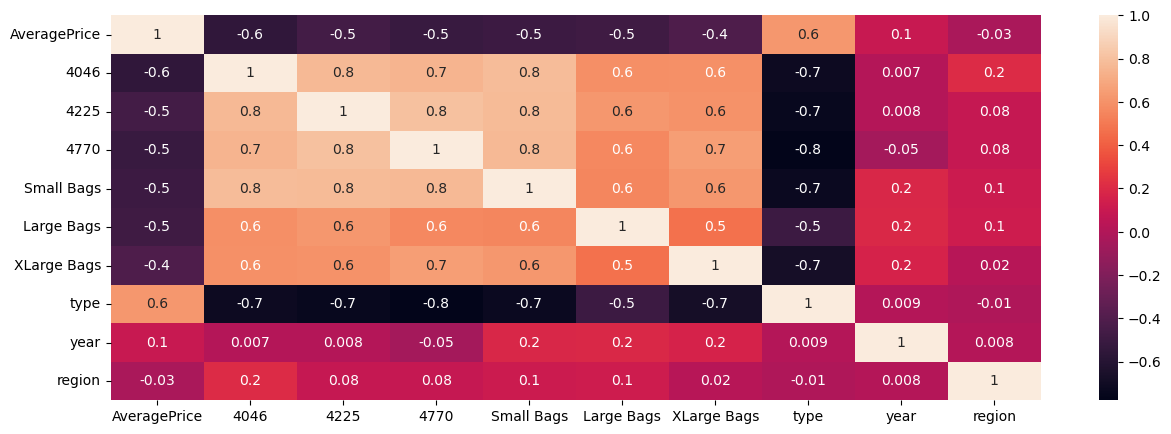

In [223]:
# Again checking heatmap
plt.figure(figsize =(15, 5))
sns.heatmap(df_region.corr(), annot =True, fmt ='.1g')
plt.show()

In [224]:
# Seperating Label and features
x =df_region.drop(columns ='region')
y =df_region[['region']]

In [225]:
# Standardizing dataset using StandardScaler

scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.625850,0.750034,1.830954,1.494529,1.610661,1.011685,-0.715441,-0.977166,-0.166161
1,0.901015,-0.435365,0.289621,1.210767,0.154476,0.256103,1.621024,-0.977166,0.897460
2,0.072885,-0.509233,0.341265,0.425448,0.185803,0.487947,1.442877,-0.977166,-0.166161
3,-0.470575,0.591516,-0.252997,0.189087,-0.220859,0.485491,-0.715441,-0.977166,-1.229782
4,-0.574092,0.574800,1.174070,1.207880,1.023547,0.179306,-0.715441,-0.977166,-0.166161
...,...,...,...,...,...,...,...,...,...
17835,-0.470575,0.540371,0.219206,-0.358695,0.465560,0.362978,-0.715441,-0.977166,-1.229782
17836,-0.185906,-0.764415,-0.237724,-0.680926,-1.471571,0.802466,-0.715441,1.023367,0.897460
17837,0.616345,-0.372407,0.397151,1.249458,0.169149,0.087696,1.626668,-0.977166,1.961081
17838,-0.185906,0.971232,0.331667,-0.060416,0.739998,0.982904,1.573602,-0.977166,0.897460


In [226]:
# Checking variance inflaction factor
vif =pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature'] =x.columns
vif

,VIF Values,Feature
0,1.913481,AveragePrice
1,3.533330,4046
2,4.115462,4225
3,4.230886,4770
4,4.067842,Small Bags
5,2.012193,Large Bags
6,2.149447,XLarge Bags
7,3.863351,type
8,1.347994,year


__VIF score for all the columns are less than 5, so do not need to delete any columns.__ 

## EDA part completed.

### Model Building

### Finding best random state

In [229]:
maxacc =0
maxrs =0

for i in range(1, 100):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    RFR =RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred =RFR.predict(x_test)
    accuracy =accuracy_score(y_test, pred)
    
    if accuracy > maxacc:
        maxacc =accuracy
        maxrs =i
        
print("Maximum accuracy is ", maxacc, "at random state ", maxrs)

Maximum accuracy is  0.9181614349775785 at random state  99


In [230]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [231]:
RFC =RandomForestClassifier()
LR =LogisticRegression()
svc =SVC()
GB =GradientBoostingClassifier()
ADA =AdaBoostClassifier()
BC =BaggingClassifier()
ET =ExtraTreesClassifier()
DT =DecisionTreeClassifier()

In [233]:
models ={'LogisticRegression': LR,
       'RandomForesClassifier': RFR,
       'SVC': svc,
       'GradientBoostingClassifier': GB,
       'AdaBoosClassifier': ADA,
       'BaggingClassifier': BC,
       'ExtraTreesClassifier': ET,
       'DecisionTreesClassifier': DT}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    print(name)
    print("\nAccuracy :", acc*100)
    print("Confusion Matrix :\n", confusion_matrix(y_test, pred))
    print("Classification Report :\n", classification_report(y_test, pred))
    
    # Cross Validation
    score =cross_val_score(model, x, y)
    print("\n\nModel Name (Cross Validation): ", model)
    print(score)
    print((score.mean())*100)
    print("Difference between accuracy score and cross validation score: ", (accuracy_score(y_test, pred)-score.mean())*100)
    print("\n")
    print("="*50)
    print('\n')

LogisticRegression

Accuracy : 49.30866965620329
Confusion Matrix :
 [[60  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  0]
 [ 0  0 57 ...  0  0  4]
 ...
 [ 0  0  0 ... 92  1  0]
 [ 0  0  0 ...  0 83  0]
 [ 0 11  4 ...  0  0 15]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.54      0.56      0.55       108
         1.0       0.27      0.34      0.30       108
         2.0       0.62      0.57      0.59       100
         3.0       0.58      0.46      0.51       102
         4.0       0.45      0.45      0.45       107
         5.0       0.52      0.42      0.47        99
         6.0       0.75      0.83      0.78        86
         7.0       0.48      0.53      0.50        92
         8.0       0.67      0.76      0.71        98
         9.0       0.43      0.74      0.54        99
        10.0       0.47      0.45      0.46        97
        11.0       0.50      0.74      0.60        86
        12.0       0.41      0.52      0.46    

__ExtraTreesClassifier is our best model with the accuracy of 93.31%.__

## Hyperparameter tunning

In [238]:
parameter ={'n_estimators' :[10, 20],
           'criterion': ['squared_error', 'friedman_mse'],
           'max_depth': [2, 8, 16],
           'min_samples_split' :[2, 4, 6],
           'min_samples_leaf' :[1, 2],
           'max_features' :['sqrt', 'log2']
           }

In [239]:
GCV =GridSearchCV(ExtraTreesRegressor(), parameter, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [2, 8, 16],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20]})

In [240]:
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [241]:
ETR =ExtraTreesRegressor(criterion ='squared_error',
 max_depth =16,
 max_features = 'sqrt',
 min_samples_leaf =1,
 min_samples_split =2,
 n_estimators =20)

ETR.fit(x_train, y_train)
pred =ETR.predict(x_test)
acc =r2_score(y_test, pred)
print("Accuracy is:", acc*100)

Accuracy is: 67.43280980666292


__Accuracy does not increase after hyperparameter tunning.__

In [246]:
# Our Final model is ExtraTreeClassifier()

Final_model =ExtraTreesClassifier()
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy is :", acc*100)

Accuracy is : 93.18011958146487


In [247]:
# Saving Model
pickle.dump(Final_model, open('Avacado_price.pkl', 'wb'))

In [249]:
# Loading the Model
loaded_model =pickle.load(open('Avacado_price.pkl', 'rb'))
pred =loaded_model.predict(x_test)
result =loaded_model.score(x_test, y_test)
print(result*100)

93.18011958146487


In [250]:
#Comparing Actual Vs Predicted
act =np.array(y_test)
df1 =pd.DataFrame()
df1['Predicted'] =pred
df1['Actual'] =act
df1

,Predicted,Actual
0,30.0,30.0
1,12.0,45.0
2,51.0,51.0
3,46.0,46.0
4,40.0,40.0
...,...,...
5347,14.0,14.0
5348,23.0,23.0
5349,27.0,27.0
5350,4.0,4.0
